#HeartBeat Sounds

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
#IMAGE PROCESS
from PIL import Image
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import IPython.display as ipd
import scipy
import tensorflow as tf
import wave

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import os, fnmatch
import random

In [ ]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = "/content/drive/MyDrive/HeartBeatSounds/Hearbeats/"

MAX_SOUND_CLIP_DURATION=12   

## Data Exploratory Analysis

In [ ]:
set_a = pd.read_csv(PATH + "set_a.csv" , delimiter=',')

In [ ]:
set_a.head(10)

dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN
5       a  set_a/artifact__201105061143.wav  artifact       NaN
6       a  set_a/artifact__201105190800.wav  artifact       NaN
7       a  set_a/artifact__201105280851.wav  artifact       NaN
8       a  set_a/artifact__201106010559.wav  artifact       NaN
9       a  set_a/artifact__201106010602.wav  artifact       NaN

In [ ]:
set_a["dataset"].value_counts()

a    176
Name: dataset, dtype: int64

In [ ]:
(set_a.isnull()).sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

In [ ]:
set_a["label"].value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [ ]:
set_b = pd.read_csv(PATH + "set_b.csv" ,  delimiter=',')

In [ ]:
set_b.head(10)

dataset                                              fname       label  \
0       b  set_b/Btraining_extrastole_127_1306764300147_C...  extrastole   
1       b  set_b/Btraining_extrastole_128_1306344005749_A...  extrastole   
2       b  set_b/Btraining_extrastole_130_1306347376079_D...  extrastole   
3       b  set_b/Btraining_extrastole_134_1306428161797_C...  extrastole   
4       b  set_b/Btraining_extrastole_138_1306762146980_B...  extrastole   
5       b  set_b/Btraining_extrastole_140_1306519735121_D...  extrastole   
6       b  set_b/Btraining_extrastole_144_1306522408528_B...  extrastole   
7       b  set_b/Btraining_extrastole_144_1306522408528_B...  extrastole   
8       b  set_b/Btraining_extrastole_148_1306768801551_B...  extrastole   
9       b  set_b/Btraining_extrastole_151_1306779785624_B...  extrastole   

  sublabel  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  
8      NaN  
9      NaN

In [ ]:
set_b["dataset"].value_counts()

b    656
Name: dataset, dtype: int64

In [ ]:
(set_b.isnull()).sum()

dataset       0
fname         0
label       195
sublabel    507
dtype: int64

In [ ]:
set_b["label"].value_counts()


normal        320
murmur         95
extrastole     46
Name: label, dtype: int64

### Combine Datasets a & b

In [ ]:
training_data = pd.concat([set_a, set_b])

In [ ]:
training_data.head(10)

dataset                             fname     label sublabel
0       a  set_a/artifact__201012172012.wav  artifact      NaN
1       a  set_a/artifact__201105040918.wav  artifact      NaN
2       a  set_a/artifact__201105041959.wav  artifact      NaN
3       a  set_a/artifact__201105051017.wav  artifact      NaN
4       a  set_a/artifact__201105060108.wav  artifact      NaN
5       a  set_a/artifact__201105061143.wav  artifact      NaN
6       a  set_a/artifact__201105190800.wav  artifact      NaN
7       a  set_a/artifact__201105280851.wav  artifact      NaN
8       a  set_a/artifact__201106010559.wav  artifact      NaN
9       a  set_a/artifact__201106010602.wav  artifact      NaN

In [ ]:
training_data["dataset"].value_counts()

b    656
a    176
Name: dataset, dtype: int64

In [ ]:
training_data.shape

(832, 4)

In [ ]:
training_data.isnull().sum()

dataset       0
fname         0
label       247
sublabel    683
dtype: int64

### Split Test Data and Training Data

In [ ]:
test_data = training_data[training_data['label'].isnull()]

In [ ]:
test_data = test_data.reset_index()

In [ ]:
test_data.shape

(247, 5)

In [ ]:
test_data.head(10)

index dataset                     fname label sublabel
0    124       a  set_a/__201012172010.wav   NaN      NaN
1    125       a  set_a/__201101051105.wav   NaN      NaN
2    126       a  set_a/__201101061552.wav   NaN      NaN
3    127       a  set_a/__201101091156.wav   NaN      NaN
4    128       a  set_a/__201101110659.wav   NaN      NaN
5    129       a  set_a/__201101152256.wav   NaN      NaN
6    130       a  set_a/__201101220549.wav   NaN      NaN
7    131       a  set_a/__201101241434.wav   NaN      NaN
8    132       a  set_a/__201102081033.wav   NaN      NaN
9    133       a  set_a/__201102081045.wav   NaN      NaN

### Drop test data from training data

In [ ]:
training_data = training_data[training_data['label'].notna()]

In [ ]:
training_data.shape


(585, 4)

In [ ]:
training_data["dataset"].value_counts()

b    461
a    124
Name: dataset, dtype: int64

In [ ]:
training_data["label"].value_counts()


normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

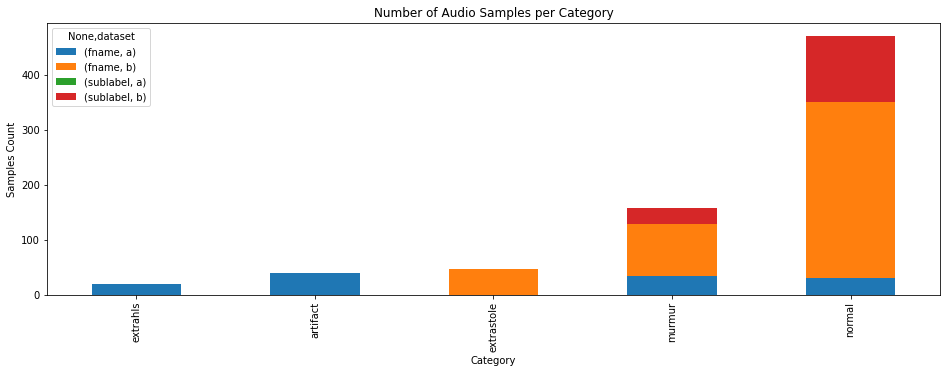

In [ ]:
# visualize data distribution by category
category_group = training_data.groupby(['label','dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count");

In [ ]:
training_data.isnull().sum()

dataset       0
fname         0
label         0
sublabel    436
dtype: int64

In [ ]:
training_data["sublabel"].value_counts()


noisynormal    120
noisymurmur     29
Name: sublabel, dtype: int64

In [ ]:
training_data = training_data.reset_index()


In [ ]:
training_data.head(10)

index dataset                             fname     label sublabel
0      0       a  set_a/artifact__201012172012.wav  artifact      NaN
1      1       a  set_a/artifact__201105040918.wav  artifact      NaN
2      2       a  set_a/artifact__201105041959.wav  artifact      NaN
3      3       a  set_a/artifact__201105051017.wav  artifact      NaN
4      4       a  set_a/artifact__201105060108.wav  artifact      NaN
5      5       a  set_a/artifact__201105061143.wav  artifact      NaN
6      6       a  set_a/artifact__201105190800.wav  artifact      NaN
7      7       a  set_a/artifact__201105280851.wav  artifact      NaN
8      8       a  set_a/artifact__201106010559.wav  artifact      NaN
9      9       a  set_a/artifact__201106010602.wav  artifact      NaN

In [ ]:
training_data.drop("index",axis="columns",inplace=True)

In [ ]:
training_data.head(10)

dataset                             fname     label sublabel
0       a  set_a/artifact__201012172012.wav  artifact      NaN
1       a  set_a/artifact__201105040918.wav  artifact      NaN
2       a  set_a/artifact__201105041959.wav  artifact      NaN
3       a  set_a/artifact__201105051017.wav  artifact      NaN
4       a  set_a/artifact__201105060108.wav  artifact      NaN
5       a  set_a/artifact__201105061143.wav  artifact      NaN
6       a  set_a/artifact__201105190800.wav  artifact      NaN
7       a  set_a/artifact__201105280851.wav  artifact      NaN
8       a  set_a/artifact__201106010559.wav  artifact      NaN
9       a  set_a/artifact__201106010602.wav  artifact      NaN

In [ ]:
training_data.describe()

dataset                             fname   label     sublabel
count      585                               585     585          149
unique       2                               585       5            2
top          b  set_a/artifact__201012172012.wav  normal  noisynormal
freq       461                                 1     351          120

### EDA

In [ ]:
x=training_data.groupby("label")["label"].count().sort_values(ascending=False)
x

label
normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: label, dtype: int64

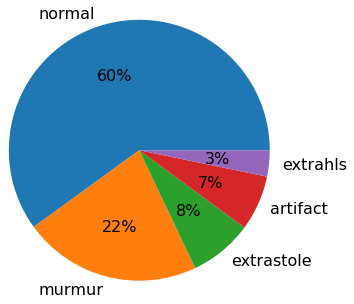

In [ ]:
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

### Timing


In [ ]:
set_a_timing = pd.read_csv( PATH + "set_a_timing.csv" ,  delimiter=',')
set_a_timing.head(10)

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992
5  set_a/normal__201102081321.wav      3    S2     73729
6  set_a/normal__201102081321.wav      4    S1     88761
7  set_a/normal__201102081321.wav      4    S2    101646
8  set_a/normal__201102081321.wav      5    S1    115246
9  set_a/normal__201102081321.wav      5    S2    127415

In [ ]:
set_a_timing.describe()

cycle       location
count  390.000000     390.000000
mean     5.733333  164639.984615
std      3.732807   99310.875752
min      1.000000    2583.000000
25%      3.000000   82313.000000
50%      5.000000  155624.500000
75%      8.000000  239709.750000
max     19.000000  390873.000000

In [ ]:
set_a_timing.isnull().sum()

fname       0
cycle       0
sound       0
location    0
dtype: int64

In [ ]:
set_a_timing["fname"].value_counts()

set_a/normal__201105011626.wav    38
set_a/normal__201105021804.wav    30
set_a/normal__201103090635.wav    26
set_a/normal__201102081321.wav    24
set_a/normal__201108011118.wav    24
set_a/normal__201106221450.wav    22
set_a/normal__201108011112.wav    18
set_a/normal__201108011115.wav    18
set_a/normal__201104141251.wav    18
set_a/normal__201103140132.wav    18
set_a/normal__201105151450.wav    18
set_a/normal__201102260502.wav    16
set_a/normal__201106141148.wav    16
set_a/normal__201106221418.wav    16
set_a/normal__201105021654.wav    14
set_a/normal__201108011114.wav    14
set_a/normal__201106210943.wav    14
set_a/normal__201103140822.wav    12
set_a/normal__201103151912.wav    12
set_a/normal__201106111136.wav    12
set_a/normal__201103221214.wav    10
Name: fname, dtype: int64

In [ ]:
set_a_timing["sound"].value_counts()

S1    195
S2    195
Name: sound, dtype: int64

In [ ]:
set_a_timing["cycle"].value_counts()

1     42
3     42
4     42
5     42
2     42
6     40
7     34
8     28
9     22
11    12
10    12
12    10
13     6
14     4
15     4
16     2
17     2
18     2
19     2
Name: cycle, dtype: int64

## Categories

### Analysis of different heart sound categories

#### Plot Audio

In [ ]:
def plotAudio(audio_file, peaks):
  plt.figure(figsize=(16, 3))
  librosa.display.waveplot(audio_file, sr=22050)
  for peak in peaks:
    plt.axvline(peak/22050, ls=':', c='k')
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  return y, sr

####  Waveform

Sound is the pressure of air propagates to our ear. Digital audio file is gotten from a sound sensor that can detects sound waves and converting it to electrical signals.

Specifically, it's telling us about the wave's displacement, and how it changes over time.

In [ ]:
def sampleCategory(audio_file, type):
  # Load use Librosa
  y, sr = librosa.load(audio_file, sr=44100)   #default sampling rate is 22 kHZ
  dur=librosa.get_duration(y)
  print ("duration:", dur)
  print(y.shape, sr)
  # librosa plot
  plt.figure(figsize=(16, 3))
  librosa.display.waveplot(y, sr=sr)
  plt.title(type)
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  return y, sr

#### Spectrum

A sound spectrum is a representation of a sound – usually a short sample of a sound – in terms of the amount of vibration at each individual frequency. 

In [ ]:
def spectrumAnalysis(sound_sample, sample_rate):
  fft_normal = np.fft.fft(sound_sample)
  magnitude_normal = np.abs(fft_normal)
  freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
  half_freq = freq_normal[:int(len(freq_normal)/2)]
  half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

  plt.figure(figsize=(12,8))
  plt.plot(half_freq,half_magnitude)
  plt.title("Spectrum")
  plt.xlabel("Frequency")
  plt.ylabel("Magnitude")
  plt.show()

#### Spectogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
For us, as human, we sense a sound not only on a particular time by its intensity, but also by its pitch. The pitch is the frequency of the sound - higher pitch corresponding to higher frequency and vice versa.

In [ ]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

def spectogramAnalysis(sound_sample):
  # STFT -> spectrogram
  # calculate duration hop length and window in seconds
  hop_length_duration = float(hop_length)/sample_rate
  n_fft_duration = float(n_fft)/sample_rate

  print("STFT hop length duration is: {}s".format(hop_length_duration))
  print("STFT window duration is: {}s".format(n_fft_duration))

  # perform stft
  stft_normal = librosa.stft(sound_sample, n_fft=n_fft, hop_length=hop_length)

  # calculate abs values on complex numbers to get magnitude
  spectrogram = np.abs(stft_normal)
  log_spectrogram = librosa.amplitude_to_db(spectrogram)

  # display spectrogram
  plt.figure(figsize=(15,10))
  librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
  plt.xlabel("Time")
  plt.ylabel("Frequency")
  plt.colorbar()
  #plt.set_cmap("YlOrBr")
  plt.title("Spectrogram")

#### MFCCS

MFCC is the widely used technique for extracting the features from the audio signal. In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.




In [ ]:
def MFCCAnlysis(sound_sample, sample_rate):
  # MFCCs
  # extract 25 MFCCs
  MFCCs = librosa.feature.mfcc(sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

  # display MFCCs
  plt.figure(figsize=(15,10))
  librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
  plt.xlabel("Time")
  plt.ylabel("MFCC coefficients")
  plt.colorbar()
  #plt.set_cmap("YlOrBr")
  plt.title("MFCCs")

  # show plots
  plt.show()

### Normal

In the Normal category there are normal, healthy heart sounds

In [ ]:
normal_file = PATH + "/set_a/normal__201106111136.wav"

In [ ]:
ipd.Audio(normal_file) 

duration: 9.927573696145124
(218903,) 44100


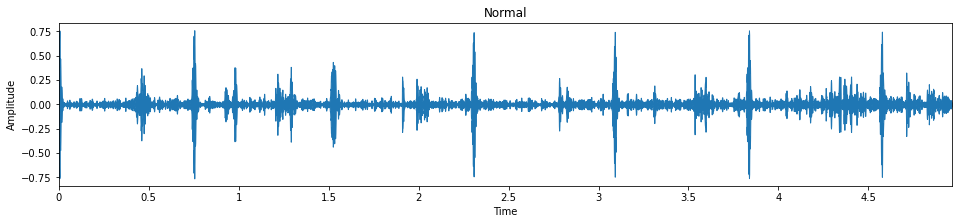

In [ ]:
sound_sample, sample_rate = sampleCategory(normal_file, "Normal")

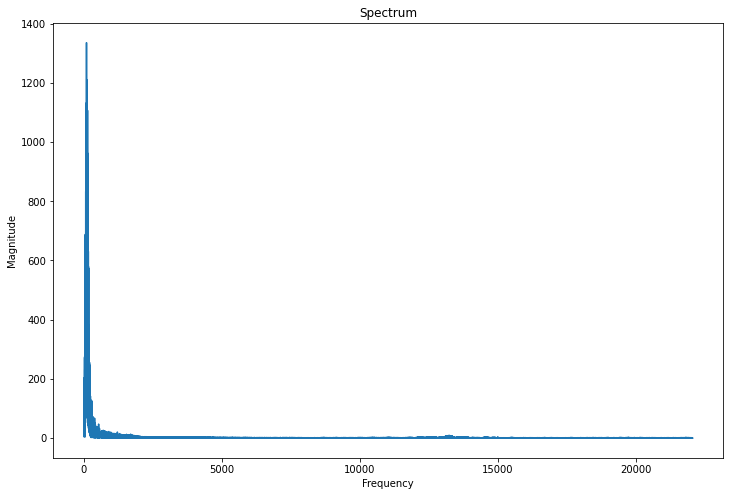

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


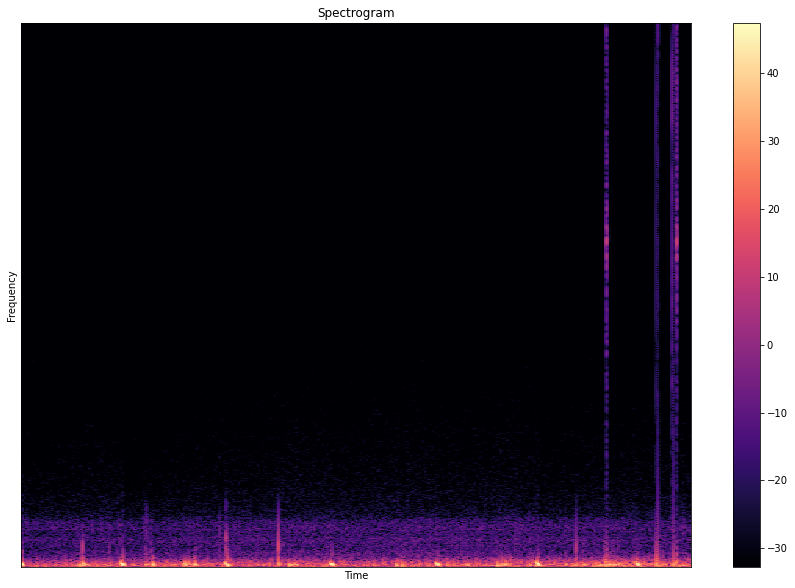

In [ ]:
spectogramAnalysis(sound_sample)

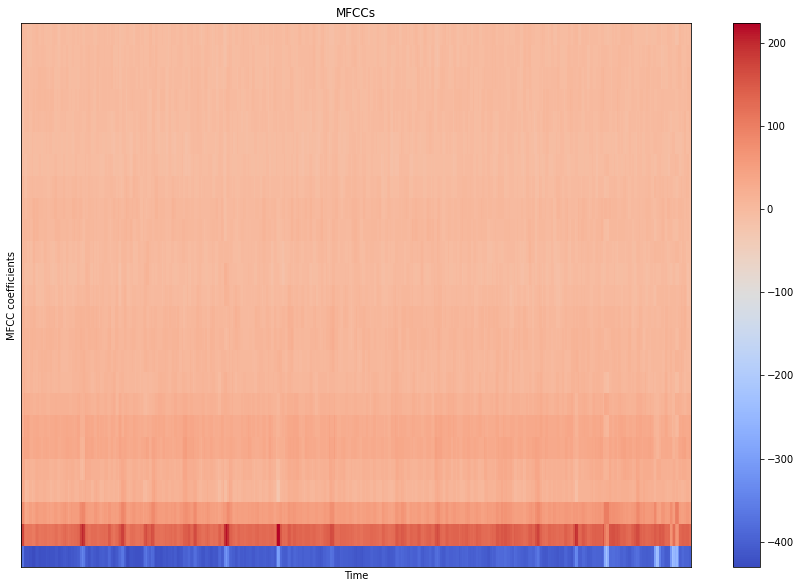

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Murmur

Heart murmurs are sounds — such as whooshing or swishing — made by rapid, choppy (turbulent) blood flow through the heart. The sounds can be heard with a device called a stethoscope.

In [ ]:
murmur_file = PATH + "/set_a/murmur__201108222231.wav"

In [ ]:
ipd.Audio(murmur_file) 

duration: 15.87111111111111
(349958,) 44100


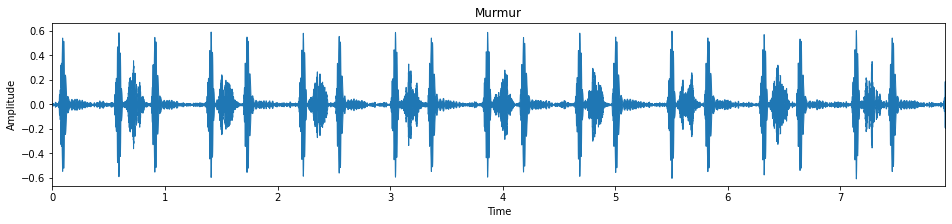

In [ ]:
sound_sample, sample_rate = sampleCategory(murmur_file, "Murmur")

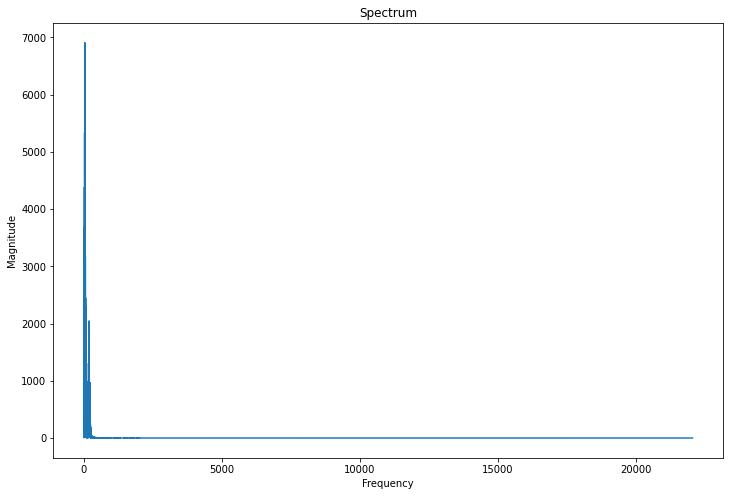

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


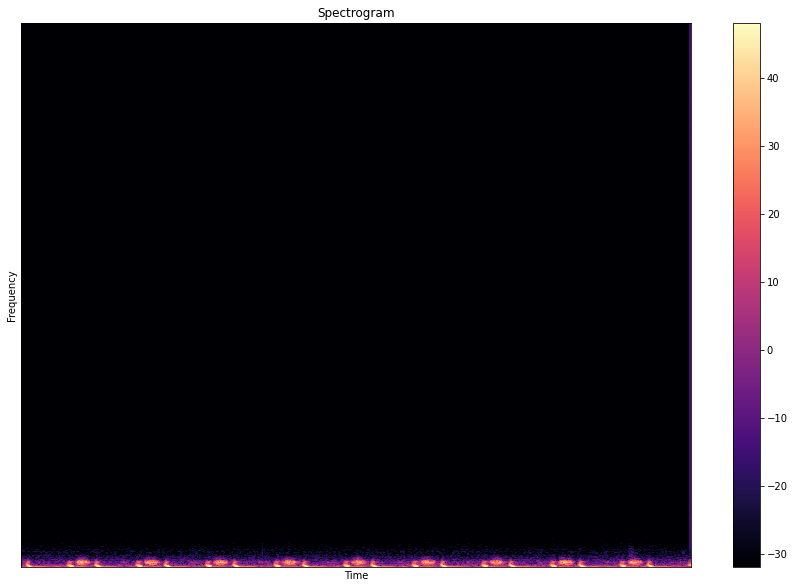

In [ ]:
spectogramAnalysis(sound_sample)

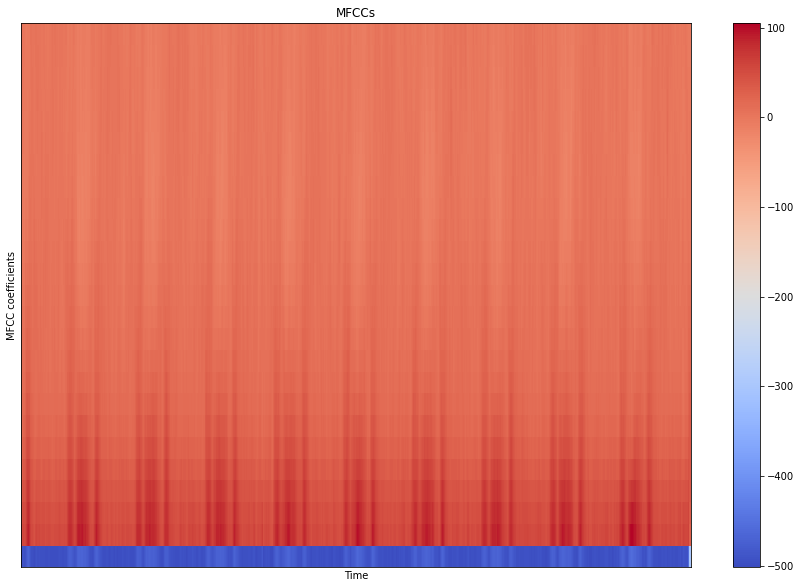

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Extrasystole

The extrasystole is the HS that is produced by performing an extra beat in each heart cycle or a skipped beat, unlike the heartbeat normal cycle.

In [ ]:
extrastole_file = PATH + "/set_b/extrastole__127_1306764300147_C2.wav"

In [ ]:
ipd.Audio(extrastole_file) 

duration: 9.35201814058957
(206212,) 44100


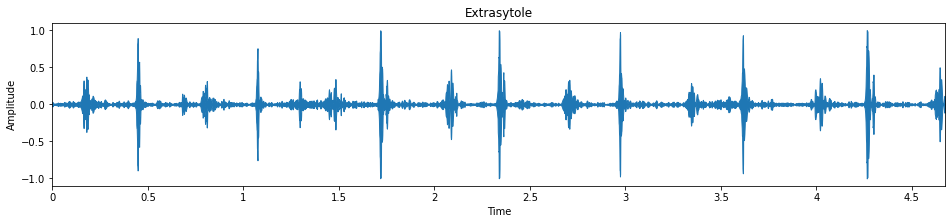

In [ ]:
sound_sample, sample_rate = sampleCategory(extrastole_file, "Extrasytole")

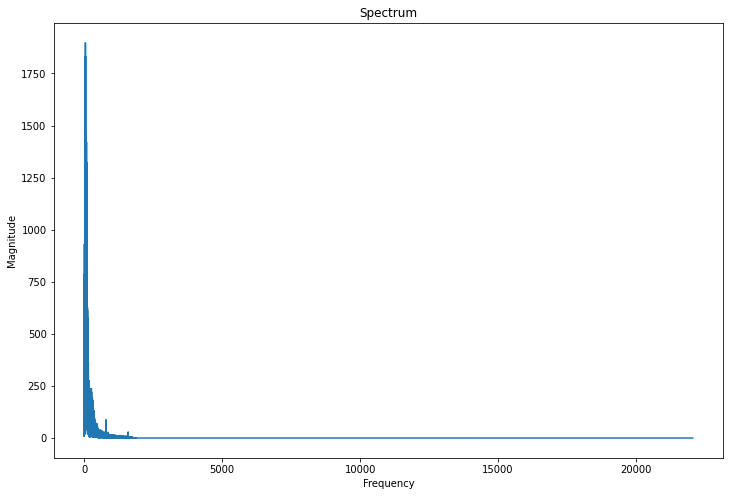

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


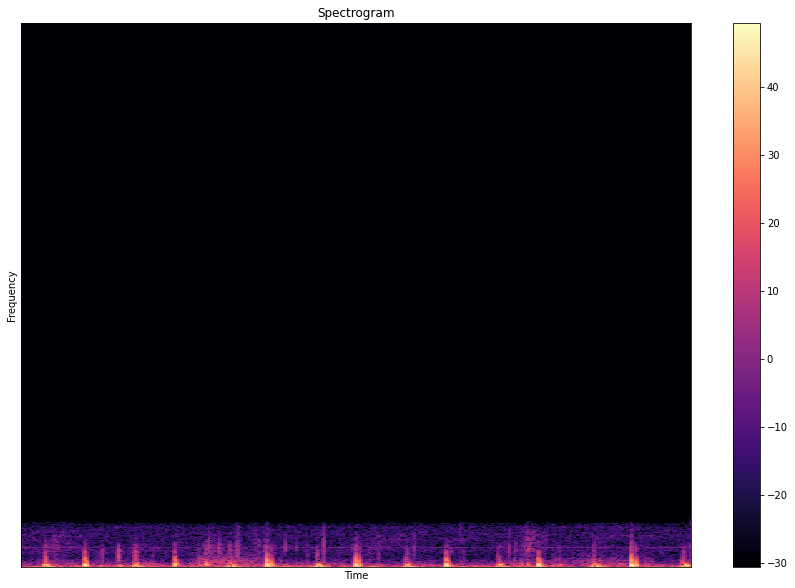

In [ ]:
spectogramAnalysis(sound_sample)

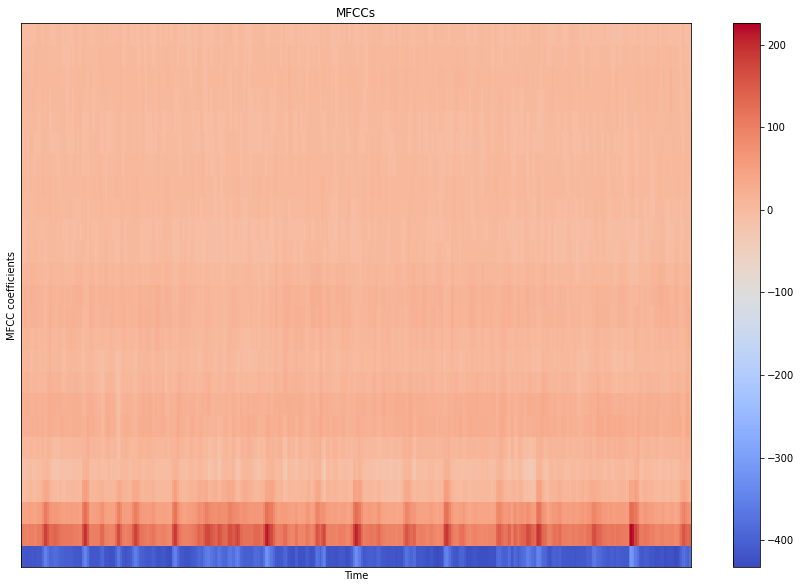

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Artifact

This includes a wide range of sounds that could not be identified as heart sounds that may indicate that try and collect data again

In [ ]:
artifact_file=PATH + "/set_a/artifact__201012172012.wav"

In [ ]:
ipd.Audio(artifact_file) 

duration: 18.0
(396900,) 44100


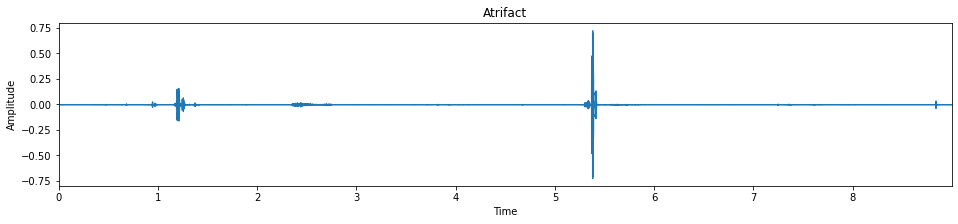

In [ ]:
sound_sample, sample_rate = sampleCategory(artifact_file, "Atrifact")

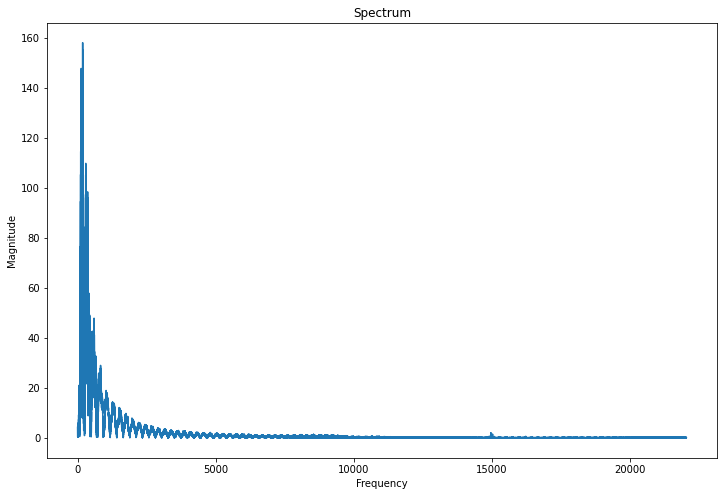

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


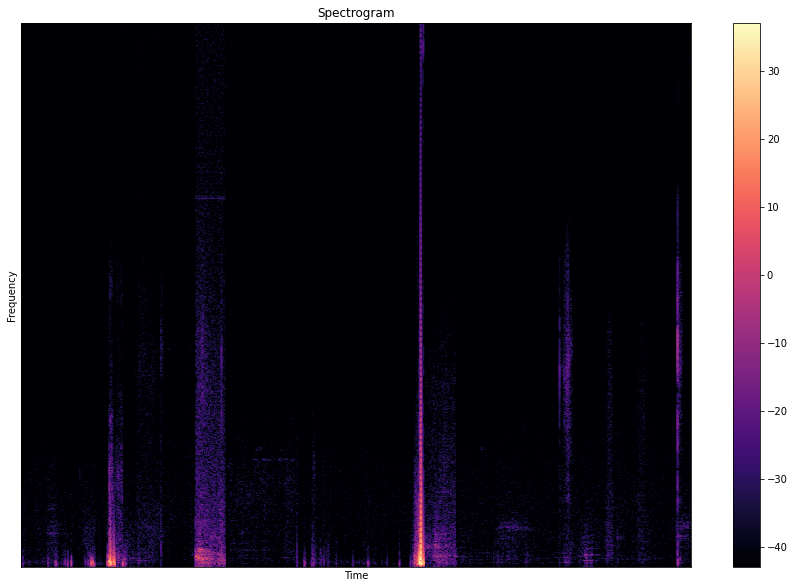

In [ ]:
spectogramAnalysis(sound_sample)

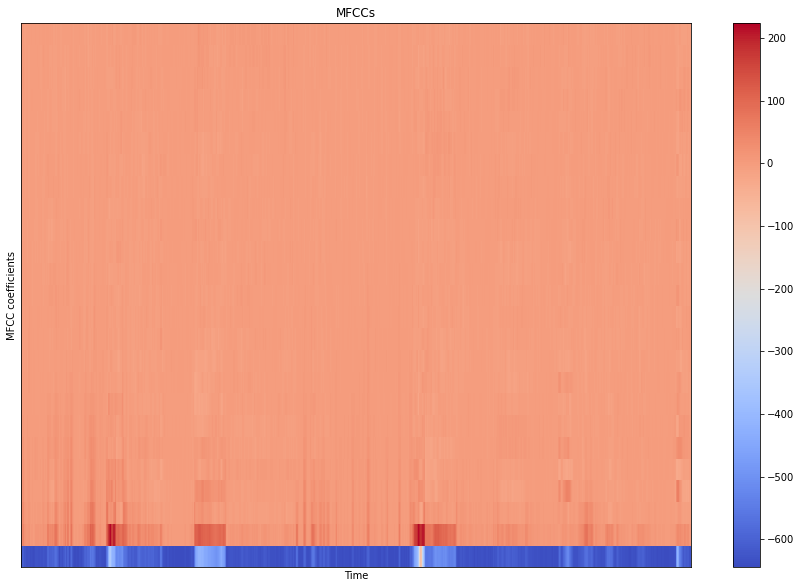

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

### Extra Heart Sound

May include an extra sound

In [ ]:
extrahls_file=PATH + "/set_a/extrahls__201101070953.wav"

In [ ]:
ipd.Audio(extrahls_file) 

duration: 17.7681179138322
(391787,) 44100


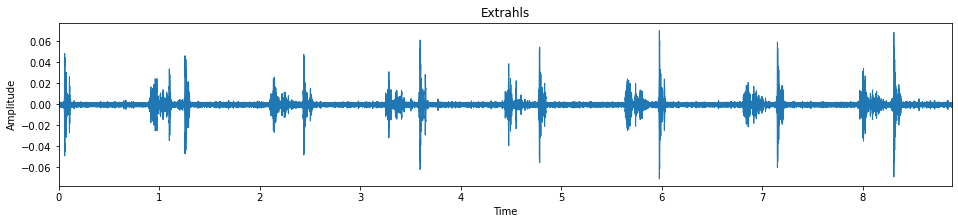

In [ ]:
sound_sample, sample_rate = sampleCategory(extrahls_file, "Extrahls")

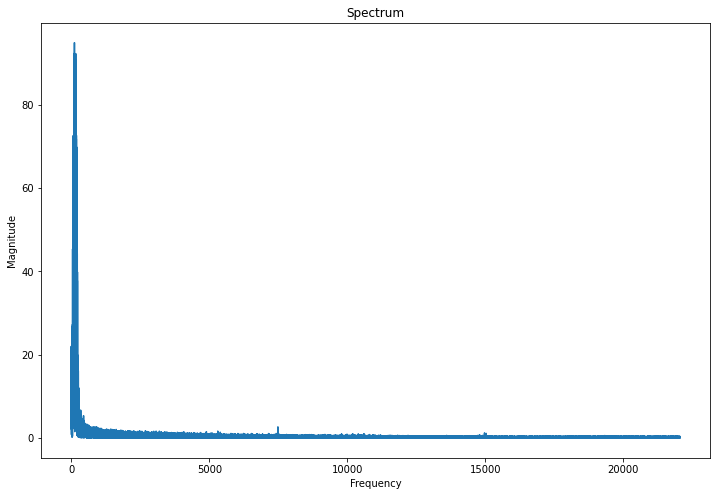

In [ ]:
spectrumAnalysis(sound_sample, sample_rate)

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


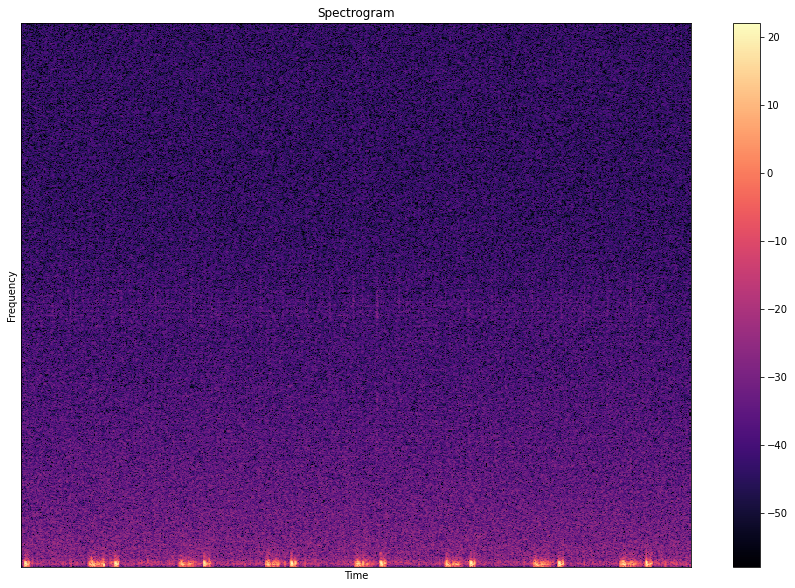

In [ ]:
spectogramAnalysis(sound_sample)

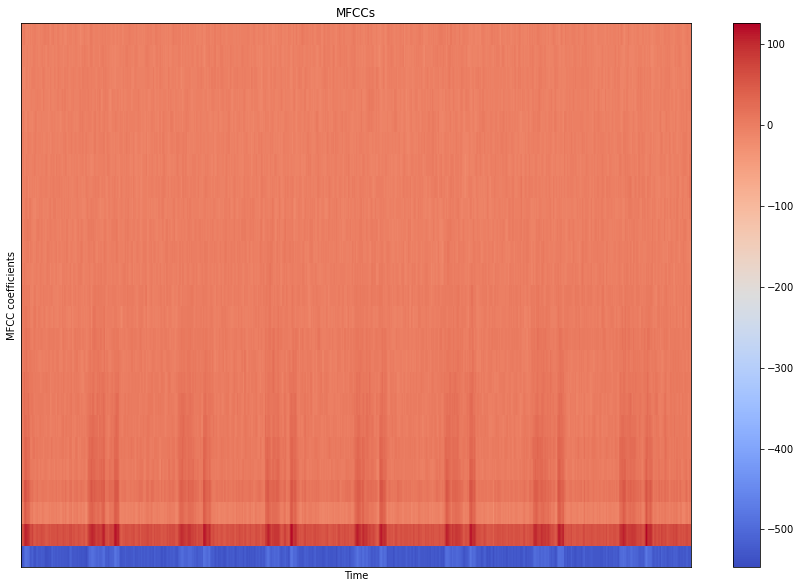

In [ ]:
MFCCAnlysis(sound_sample, sample_rate)

## Data Segmentation


In [ ]:
set_a_timing_fnames = set_a_timing.fname.unique()
print(set_a_timing_fnames)

['set_a/normal__201102081321.wav' 'set_a/normal__201102260502.wav'
 'set_a/normal__201103090635.wav' 'set_a/normal__201103140132.wav'
 'set_a/normal__201103140822.wav' 'set_a/normal__201103151912.wav'
 'set_a/normal__201103221214.wav' 'set_a/normal__201104141251.wav'
 'set_a/normal__201105011626.wav' 'set_a/normal__201105021654.wav'
 'set_a/normal__201105021804.wav' 'set_a/normal__201105151450.wav'
 'set_a/normal__201106111136.wav' 'set_a/normal__201106141148.wav'
 'set_a/normal__201106210943.wav' 'set_a/normal__201106221418.wav'
 'set_a/normal__201106221450.wav' 'set_a/normal__201108011112.wav'
 'set_a/normal__201108011114.wav' 'set_a/normal__201108011115.wav'
 'set_a/normal__201108011118.wav']


In [ ]:
len(set_a_timing.fname.unique())

21

In [ ]:
set_a_timing.head(10)

fname  cycle sound  location
0  set_a/normal__201102081321.wav      1    S1     10021
1  set_a/normal__201102081321.wav      1    S2     20759
2  set_a/normal__201102081321.wav      2    S1     35075
3  set_a/normal__201102081321.wav      2    S2     47244
4  set_a/normal__201102081321.wav      3    S1     62992
5  set_a/normal__201102081321.wav      3    S2     73729
6  set_a/normal__201102081321.wav      4    S1     88761
7  set_a/normal__201102081321.wav      4    S2    101646
8  set_a/normal__201102081321.wav      5    S1    115246
9  set_a/normal__201102081321.wav      5    S2    127415

In [ ]:
set_a_timing.shape

(390, 4)

In [ ]:
data_x = []
data_y_s1 = []
data_y_s2 = []

set_a_timing_fnames = set_a_timing.fname.unique()
timing_counts = set_a_timing["fname"].value_counts()

i = 0
for fname in set_a_timing_fnames:
  print(f"Loading {fname}")
  data, sampling_rate = librosa.load(PATH + fname, sr = 44100)
  j = 0
  while i<len(set_a_timing) and set_a_timing.iloc[i,0] == fname:
    try:
      if j==0:
        range_start1 = 0
        range_start2 = int(set_a_timing.iloc[i,3])
        range_end1 = int(set_a_timing.iloc[i+1, 3])
        range_end2 = int(set_a_timing.iloc[i+2, 3])
      elif j==timing_counts[fname]-2:
        range_start1 = int(set_a_timing.iloc[i-1,3])
        range_start2 = int(set_a_timing.iloc[i,3])
        range_end1 = int(set_a_timing.iloc[i+1, 3])
        range_end2 = int(set_a_timing.iloc[i+1, 3]) + 10000
      else:
        range_start1 = int(set_a_timing.iloc[i-1,3])
        range_start2 = int(set_a_timing.iloc[i,3])
        range_end1 = int(set_a_timing.iloc[i+1, 3])
        range_end2 = int(set_a_timing.iloc[i+2, 3])

      rand_start = random.randrange(range_start1,range_start2)
      rand_end = random.randrange(range_end1,range_end2)        
      temp_data = data[rand_start: rand_end]
      # mfcc =  librosa.feature.mfcc(temp_data , sr=sampling_rate, n_mfcc=40)
      # mfccs = np.mean(librosa.feature.mfcc(y=temp_data, sr=sampling_rate, n_mfcc=40).T,axis=0)  
      # feature = np.array(mfccs).reshape([-1,1])

      # tmp = []
      # tmp.append(set_a_timing[i,2])
      # tmp.append(set_a_timing[i+1,2])
      s1_label = int(set_a_timing.iloc[i, 3]) - rand_start
      s2_label = int(set_a_timing.iloc[i+1, 3]) - rand_start

      data_x.append(temp_data)
      data_y_s1.append(s1_label)
      data_y_s2.append(s2_label)
    except:
      print(f"Error reading {i} {fname}")
      pass
    j += 2
    i += 2


Loading set_a/normal__201102081321.wav
Loading set_a/normal__201102260502.wav
Loading set_a/normal__201103090635.wav
Loading set_a/normal__201103140132.wav
Loading set_a/normal__201103140822.wav
Loading set_a/normal__201103151912.wav
Loading set_a/normal__201103221214.wav
Loading set_a/normal__201104141251.wav
Loading set_a/normal__201105011626.wav
Loading set_a/normal__201105021654.wav
Loading set_a/normal__201105021804.wav
Loading set_a/normal__201105151450.wav
Loading set_a/normal__201106111136.wav
Loading set_a/normal__201106141148.wav
Loading set_a/normal__201106210943.wav
Loading set_a/normal__201106221418.wav
Loading set_a/normal__201106221450.wav
Loading set_a/normal__201108011112.wav
Loading set_a/normal__201108011114.wav
Loading set_a/normal__201108011115.wav
Loading set_a/normal__201108011118.wav


In [ ]:
Max = 0
for row in data_x:
  Max = max(Max, len(row))
print(Max)

77297


In [ ]:
len(data_x)

195

In [ ]:
data_x[100].shape

(24604,)

In [ ]:
print(len(set_a_timing))

390


In [ ]:
plotAudio(data_x[20], [])

In [ ]:
print(len(data_x))

195


### Padding

In [ ]:
#preprocess the data
from keras_preprocessing.sequence import pad_sequences

train_x = pad_sequences(data_x, maxlen=Max, dtype='float', padding='post', truncating='post', value=0.001)
train_x = pd.DataFrame(np.row_stack(train_x))

train_x = train_x / np.max(train_x)

# train_x = train_x[:,:,np.newaxis]
train_y_s1 = pd.DataFrame(data_y_s1)
train_y_s2 = pd.DataFrame(data_y_s2)


train_y_s1 = train_y_s1/44100
train_y_s2 = train_y_s2/44100

train_y_s1.columns = ['s1']
train_y_s2.columns = ['s2']
train_y = train_y_s1
train_y['s2'] = train_y_s2['s2']

# print(data_y.value_counts())

# data_y = data_y.map({'S1':0, 'S2':1}).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, train_size=0.7, random_state=42, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5, random_state=42, shuffle=True)

In [ ]:
y_train_np =(np.array(y_train['s1']),np.array(y_train['s2']))
y_val_np = (np.array(y_val['s1']), np.array(y_val['s2']))

### FNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(Max,))
    first_dense = Dense(units='128', activation='relu')(input_layer)
    # Y1 output will be fed from the first dense
    y1_output = Dense(units='1', name='s1')(first_dense)    
    second_dense = Dense(units='128',activation='relu')(first_dense)
    # Y2 output will be fed from the second dense
    y2_output = Dense(units='1',name='s2')(second_dense)    
    # Define the model with the input layer 
    # and a list of output layers
    model = Model(inputs=input_layer,outputs=[y1_output, y2_output])
    return model

In [ ]:
model = build_model()
# Specify the optimizer, and compile the model with loss functions for both outputs
# optimizer = tf.keras.optimizers.SGD(lr=0.001)
# optimizer = tf.keras.optimizers.SGD(lr=0.00001)
optimizer = tf.keras.optimizers.SGD(lr=0.0002) #best learning rate 

model.compile(optimizer=optimizer,
              loss={'s1': 'mse', 's2': 'mse'},
 metrics={'s1':tf.keras.metrics.RootMeanSquaredError(),
          's2':tf.keras.metrics.RootMeanSquaredError()})

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Train the model for 100 epochs
history = model.fit(x_train, y_train_np,
   epochs=20, batch_size=10, validation_data=(x_val, y_val_np))

Epoch 1/20
14/14 [==============================] - 2s 51ms/step - loss: 0.4476 - s1_loss: 0.0884 - s2_loss: 0.3592 - s1_root_mean_squared_error: 0.2973 - s2_root_mean_squared_error: 0.5993 - val_loss: 0.2295 - val_s1_loss: 0.0601 - val_s2_loss: 0.1694 - val_s1_root_mean_squared_error: 0.2452 - val_s2_root_mean_squared_error: 0.4115
Epoch 2/20
14/14 [==============================] - 0s 33ms/step - loss: 0.2562 - s1_loss: 0.0697 - s2_loss: 0.1865 - s1_root_mean_squared_error: 0.2639 - s2_root_mean_squared_error: 0.4319 - val_loss: 0.2136 - val_s1_loss: 0.0601 - val_s2_loss: 0.1535 - val_s1_root_mean_squared_error: 0.2452 - val_s2_root_mean_squared_error: 0.3918
Epoch 3/20
14/14 [==============================] - 0s 31ms/step - loss: 0.1984 - s1_loss: 0.0618 - s2_loss: 0.1365 - s1_root_mean_squared_error: 0.2487 - s2_root_mean_squared_error: 0.3695 - val_loss: 0.1955 - val_s1_loss: 0.0590 - val_s2_loss: 0.1365 - val_s1_root_mean_squared_error: 0.2429 - val_s2_root_mean_squared_error: 0.

In [ ]:
# Test the model and print loss and rmse for both outputs
loss,Y1_loss,Y2_loss,Y1_rmse,Y2_rmse=model.evaluate(x=x_val, y=(y_val['s1'],y_val['s2']))
print("")
print(f'loss: {loss}')
print(f'S1_loss: {Y1_loss}')
print(f'S2_loss: {Y2_loss}')
print(f'S1: {Y1_rmse}')
print(f'S2: {Y2_rmse}')

1/1 [==============================] - 1s 662ms/step - loss: 0.1274 - s1_loss: 0.0551 - s2_loss: 0.0722 - s1_root_mean_squared_error: 0.2348 - s2_root_mean_squared_error: 0.2688

loss: 0.1273781657218933
S1_loss: 0.05514450743794441
S2_loss: 0.0722336545586586
S1: 0.23482868075370789
S2: 0.2687631845474243


In [ ]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

1/1 [==============================] - 0s 107ms/step


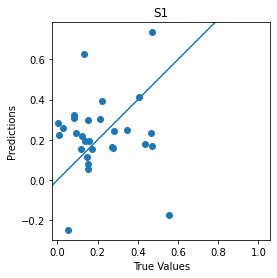

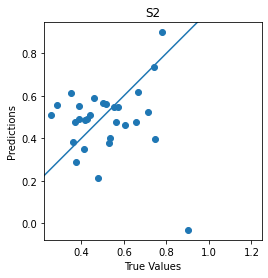

In [ ]:
# Run predict
Y_pred = model.predict(x_test)
s1 = Y_pred[0]
s2 = Y_pred[1]
plot_diff(y_test['s1'], Y_pred[0], title='S1')
plot_diff(y_test['s2'], Y_pred[1], title='S2')

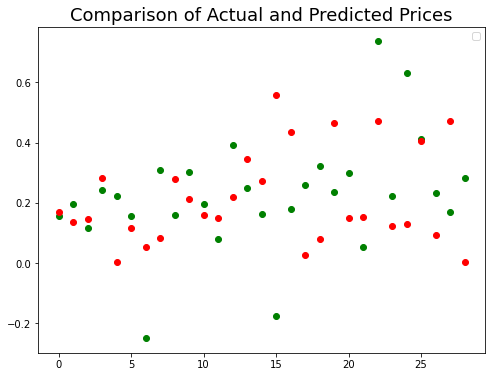

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s1)), s1.flatten(), color='green')
plt.scatter(range(len(s1)), np.array(y_test['s1']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

In [ ]:
min(train_y_s1['s2'])

0.185578231292517

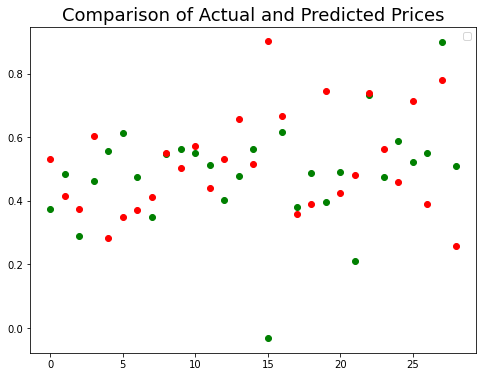

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s2)), s2.flatten(), color='green')
plt.scatter(range(len(s2)), np.array(y_test['s2']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

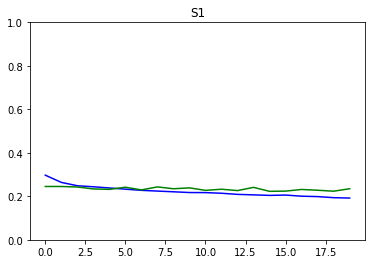

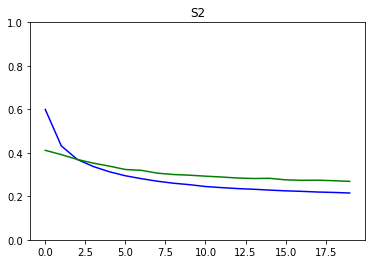

In [ ]:
# Plot RMSE
plot_metrics(metric_name='s1_root_mean_squared_error', title='S1', ylim=1)
plot_metrics(metric_name='s2_root_mean_squared_error', title='S2', ylim=1)

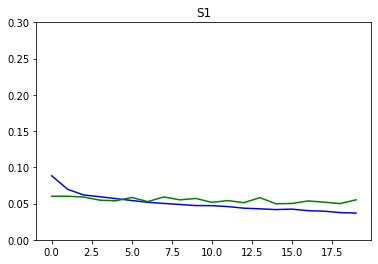

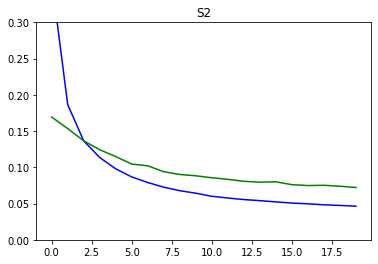

In [ ]:
# Plot RMSE
plot_metrics(metric_name='s1_loss', title='S1', ylim=0.3)
plot_metrics(metric_name='s2_loss', title='S2', ylim=0.3)

In [ ]:
x_test.iloc[1:2]

0      1         2         3      4         5         6         7      \
60  0.000284    0.0  0.000081 -0.000202    0.0 -0.000604 -0.000241 -0.000322   

       8         9      ...  77287  77288  77289  77290  77291  77292  77293  \
60 -0.000121 -0.000604  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

    77294  77295  77296  
60    1.0    1.0    1.0  

[1 rows x 77297 columns]

In [ ]:
Y_pred = model.predict(x_test.iloc[0:1])

1/1 [==============================] - 0s 27ms/step


In [ ]:
train_y_s1['s1'][60]

0.13523809523809524

In [ ]:
train_y_s2['s2'][60]

0.41689342403628116

In [ ]:
print(Y_pred[0])
print(Y_pred[1])


[[0.15507874]]
[[0.37528613]]


### CNN Model

#### Functions

In [ ]:
def padding(array, xx, yy):
  """
  :param array: numpy array
  :param xx: desired height
  :param yy: desirex width
  :return: padded array
  """
  h = array.shape[0]
  w = array.shape[1]
  a = max((xx - h) // 2,0)
  aa = max(0,xx - a - h)
  b = max(0,(yy - w) // 2)
  bb = max(yy - b - w,0)
  return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [ ]:
def generate_features(y_cut):
    max_size=MAX_WIDTH #my max audio file feature width
    stft = padding(np.abs(librosa.stft(y_cut, n_fft=255, hop_length = 512)), 128, max_size)
    MFCCs = padding(librosa.feature.mfcc(y_cut, n_fft=255, hop_length=512,n_mfcc=128),128,max_size)
    spec_centroid = librosa.feature.spectral_centroid(y=y_cut, sr=SAMPLE_RATE)
    chroma_stft = librosa.feature.chroma_stft(y=y_cut, sr=SAMPLE_RATE)
    spec_bw = librosa.feature.spectral_bandwidth(y=y_cut, sr=SAMPLE_RATE)
    #Now the padding part
    image = np.array([padding(normalize(spec_bw),1, max_size)]).reshape(1,max_size)
    image = np.append(image,padding(normalize(spec_centroid),1, max_size), axis=0) 
    #repeat the padded spec_bw,spec_centroid and chroma stft until they are stft and MFCC-sized
    for i in range(0,9):
        image = np.append(image,padding(normalize(spec_bw),1, max_size), axis=0)
        image = np.append(image, padding(normalize(spec_centroid),1, max_size), axis=0)
        image = np.append(image, padding(normalize(chroma_stft),12, max_size), axis=0)
    image=np.dstack((image,np.abs(stft)))
    image=np.dstack((image,MFCCs))
    return image

In [ ]:
def get_features(df_in):   
  features=[]     
  labels = [] #empty array to store labels     
      
  for j in range(0,len(df_in)):    
      data = generate_features(df_in[j])
      features.append(data[np.newaxis,...])    
  output=np.concatenate(features,axis=0)     
  return(np.array(output))

#### Generate Features

In [ ]:
train_x = pd.DataFrame(data_x)

train_y_s1 = pd.DataFrame(data_y_s1)
train_y_s2 = pd.DataFrame(data_y_s2)

# train_x = train_x / np.max(train_x)

train_y_s1 = train_y_s1/44100
train_y_s2 = train_y_s2/44100

train_y_s1.columns = ['s1']
train_y_s2.columns = ['s2']
train_y = train_y_s1
train_y['s2'] = train_y_s2['s2']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, train_y, train_size=0.7, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5, shuffle=True)

In [ ]:
#use get_features to calculate and store the features
test_features = get_features(x_test)
train_features = get_features(x_train)
val_features = get_features(x_val)

In [ ]:
train_features.shape

(136, 128, 625, 3)

#### Functions

In [ ]:
def make_default_hidden_layers(inputs):
    """
    Used to generate a default set of hidden layers. The structure used in this network is defined as:
    
    Conv2D -> BatchNormalization -> Pooling -> Dropout
    """
    x = Conv2D(16, (3, 3))(inputs)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32, (3, 3))(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32, (3, 3))(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

def build_s1_branch( inputs):   
        """
        Used to build the s1 branch of our network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("linear", name="s1")(x)
        return x

def build_s2_branch( inputs):   
        """
        Used to build the age branch of our network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("linear", name="s2")(x)
        return x

def assemble_full_model(length=128, width=MAX_WIDTH):
        """
        Used to assemble our multi-output model CNN.
        """
        inputs = Input(shape=(length,width,3))
        s1_branch = build_s1_branch(inputs)
        s2_branch = build_s2_branch(inputs)


        model = Model(inputs=inputs,
                     outputs = [s1_branch, s2_branch])
        return model

#### Build Model

In [ ]:
CNNModel = assemble_full_model(128, MAX_WIDTH)

In [ ]:
from keras.optimizers import Adam
init_lr = 0.0001
epochs = 20
opt = Adam(lr=0.00002)
CNNModel.compile(optimizer= tf.keras.optimizers.SGD(), 
              loss={
                  's1': 'mean_squared_error', 
                  's2': 'mean_squared_error'}, 
              metrics={
                  's1':tf.keras.metrics.MeanSquaredError(), 
                  's2': tf.keras.metrics.MeanSquaredError()})

In [ ]:
from keras.callbacks import ModelCheckpoint
batch_size = 10
valid_batch_size = 10
# Train the model for 20 epochs
history = CNNModel.fit(train_features, y_train,
   epochs=20, validation_data=(val_features, y_val))

Epoch 1/20
5/5 [==============================] - 24s 4s/step - loss: 10.5818 - s1_loss: 6.5598 - s2_loss: 4.0221 - s1_mean_squared_error: 6.5598 - s2_mean_squared_error: 4.0221 - val_loss: 360.5797 - val_s1_loss: 3.6289 - val_s2_loss: 356.9508 - val_s1_mean_squared_error: 3.6289 - val_s2_mean_squared_error: 356.9508
Epoch 2/20
5/5 [==============================] - 18s 4s/step - loss: 1.8009 - s1_loss: 0.7966 - s2_loss: 1.0043 - s1_mean_squared_error: 0.7966 - s2_mean_squared_error: 1.0043 - val_loss: 23.0461 - val_s1_loss: 2.0006 - val_s2_loss: 21.0455 - val_s1_mean_squared_error: 2.0006 - val_s2_mean_squared_error: 21.0455
Epoch 3/20
5/5 [==============================] - 18s 4s/step - loss: 1.6978 - s1_loss: 0.6844 - s2_loss: 1.0134 - s1_mean_squared_error: 0.6844 - s2_mean_squared_error: 1.0134 - val_loss: 49.7477 - val_s1_loss: 4.7831 - val_s2_loss: 44.9646 - val_s1_mean_squared_error: 4.7831 - val_s2_mean_squared_error: 44.9646
Epoch 4/20
5/5 [==============================] - 2

#### Results

1/1 [==============================] - 1s 1s/step


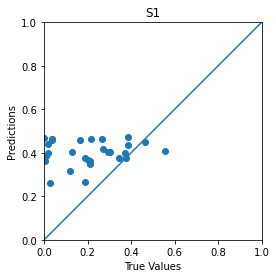

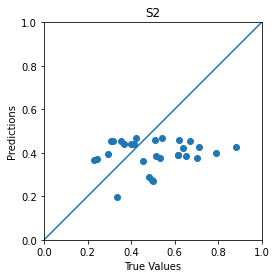

In [ ]:
# Run predict
Y_pred = CNNModel.predict(test_features)
s1 = Y_pred[0]
s2 = Y_pred[1]
plot_diff(y_test['s1'], Y_pred[0], title='S1')
plot_diff(y_test['s2'], Y_pred[1], title='S2')

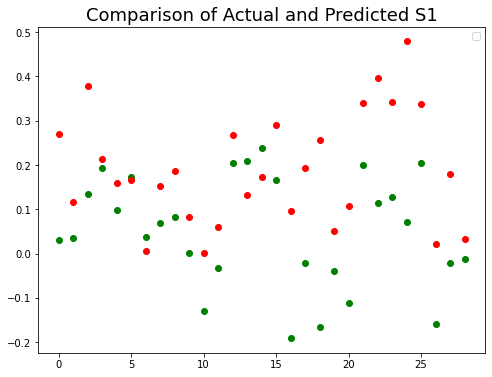

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s1)), s1.flatten(), color='green')
plt.scatter(range(len(s1)), np.array(y_test['s1']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted S1", fontsize=18)
plt.show()

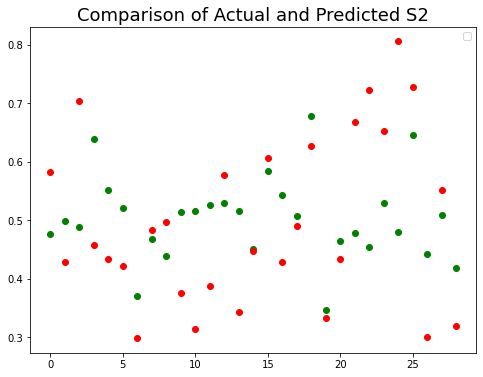

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s2)), s2.flatten(), color='green')
plt.scatter(range(len(s2)), np.array(y_test['s2']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted S2", fontsize=18)
plt.show()

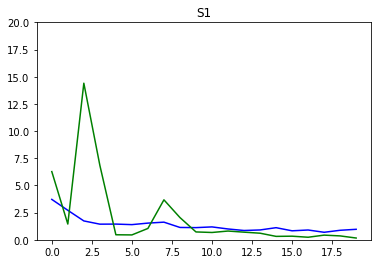

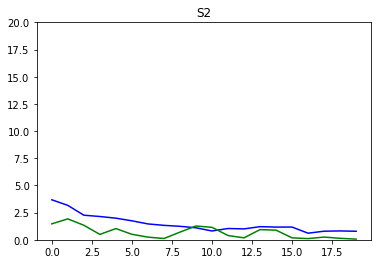

In [ ]:
# Plot RMSE
plot_metrics(metric_name='s1_loss', title='S1',ylim=20)
plot_metrics(metric_name='s2_loss', title='S2',ylim=20)

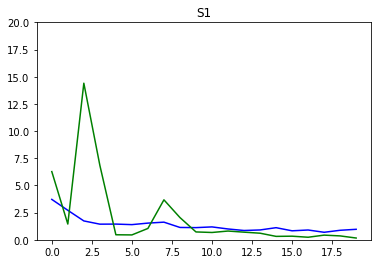

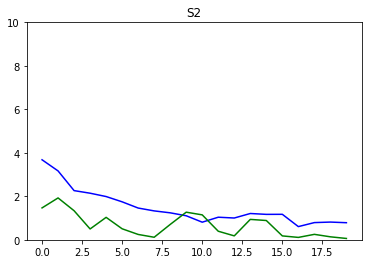

In [ ]:
# Plot RMSE
plot_metrics(metric_name='s1_mean_squared_error', title='S1',ylim=20)
plot_metrics(metric_name='s2_mean_squared_error', title='S2',ylim=10)

In [ ]:
score = CNNModel.evaluate(test_features, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.1040 - s1_loss: 0.0523 - s2_loss: 0.0518 - s1_mean_squared_error: 0.0523 - s2_mean_squared_error: 0.0518


In [ ]:
appendResults("CNN", "Scheduler", "MSE", "MSE", history.history["loss"][epochs-1], history.history["val_loss"][epochs-1], score[0])

In [ ]:
displayResults()

Architecture         LR Loss Metrics  Train Loss  Val Loss  Test_Loss
0          CNN      0.001  MSE     MSE    0.050377  0.125228   0.223917
1          CNN    0.00001  MSE     MSE    4.670242  0.852779   0.781792
2          CNN     0.0002  MSE     MSE    2.921401  0.350184   0.215274
3          CNN    0.00002  MSE     MSE    3.138101  0.283082   0.228382
4          CNN  Scheduler  MSE     MSE    0.131471  0.125857   0.104039

###Envelope Test

In [ ]:
peak = max(y)/4
print('Detect peaks with minimum height and distance filters.')
indexes, _ = scipy.signal.find_peaks(y, height=peak, distance=5000)
print('Peaks are: %s' % (indexes))

Detect peaks with minimum height and distance filters.
Peaks are: [   771   6292  13044  31145  39490  48702  66042  84071  93799 101345
 119992 129546 140971 160704 178790 190136 197366]


(array([ 0.01222396,  0.01763651,  0.01487106, ..., -0.00073158,
        -0.00096393, -0.00068613], dtype=float32), 22050)

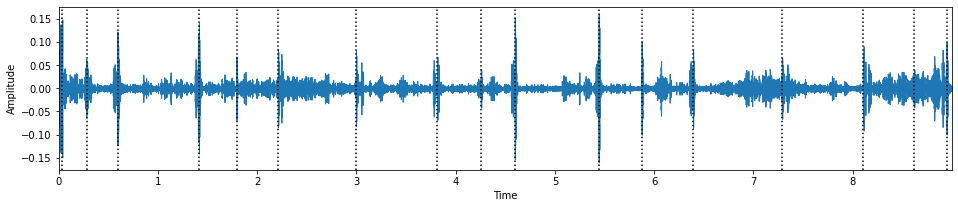

In [ ]:
plotAudio(y, indexes)

In [ ]:
from scipy.signal import butter,filtfilt
def butter_highpass(data,cutoff, fs, order=5):
   """
   Design a highpass filter.
   Args:
   - cutoff (float) : the cutoff frequency of the filter.
   - fs     (float) : the sampling rate.
   - order    (int) : order of the filter, by default defined to 5.
   """
   # calculate the Nyquist frequency
   nyq = 0.5 * fs
   # design filter
   high = cutoff / nyq
   b, a = butter(order, high, btype='high', analog=False)
   # returns the filter coefficients: numerator and denominator
   y = filtfilt(b, a, data)
   return y
x_f=butter_highpass(y,20, sr, order=5)

/usr/local/lib/python3.8/dist-packages/librosa/util/utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


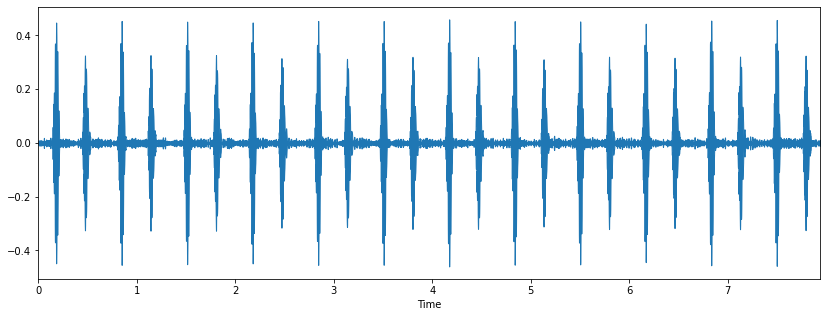

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_f, sr=sr)
plt.show()

In [ ]:
y= x_f

In [ ]:
# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

In [ ]:
len(y)

174979

In [ ]:
onset_frames

array([  4,   7,  20,  28,  36,  49,  65,  78,  85,  94, 100, 106, 117,
       122, 135, 145, 151, 158, 164, 171, 179, 186, 192, 200, 203, 208,
       215, 221, 227, 237, 242, 250, 256, 265, 278, 284, 294, 307, 317,
       323, 336])

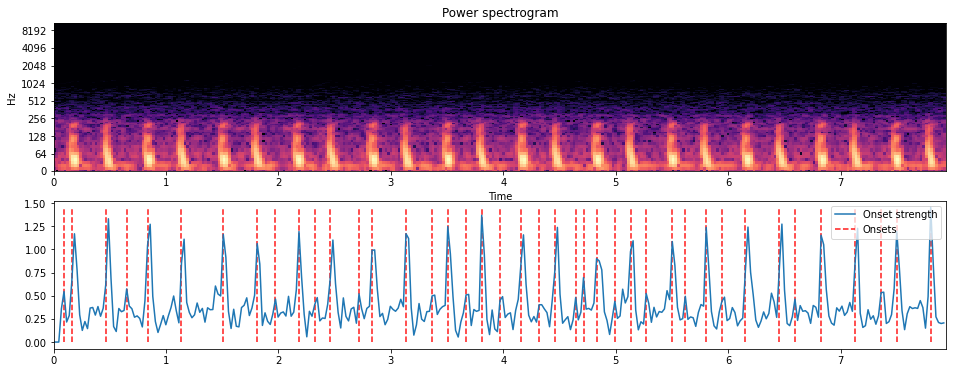

In [ ]:
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

In [ ]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
# Backtrack the events using the RMS values
rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])

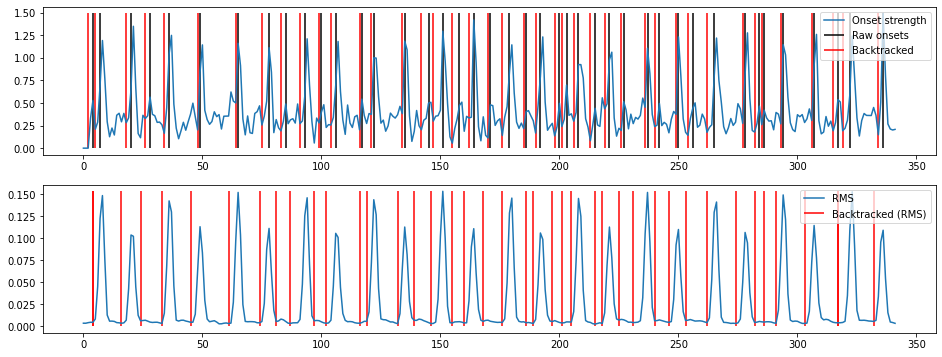

In [ ]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms[0], label='RMS')
plt.vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

In [ ]:
inputs = tf.keras.layers.Input(shape=(65000,))
model  = final_model(inputs)

In [ ]:
model.compile(optimizer='adam', 
             loss = {'s1': 'mse',
                    's2': 'mse'},
             metrics={'s1': tf.keras.metrics.RootMeanSquaredError(),
                     's2': tf.keras.metrics.RootMeanSquaredError()})

In [ ]:
print(data_x.shape, data_y.shape)

(347, 20000, 1) (347,)


In [ ]:
# Get onset times from a signal
file = PATH + "/set_a/normal__201106111136.wav"
y, sr = librosa.load(file)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.48761905, 0.7662585 , 0.95201814, 1.25387755, 1.53251701,
       1.92725624, 2.32199546, 2.80961451, 3.11147392, 3.57587302,
       3.80807256, 3.85451247, 4.13315193, 4.36535147, 4.59755102,
       4.73687075, 4.85297052])

In [ ]:
print(sr)

22050


duration: 9.927573696145124
(218903,) 44100


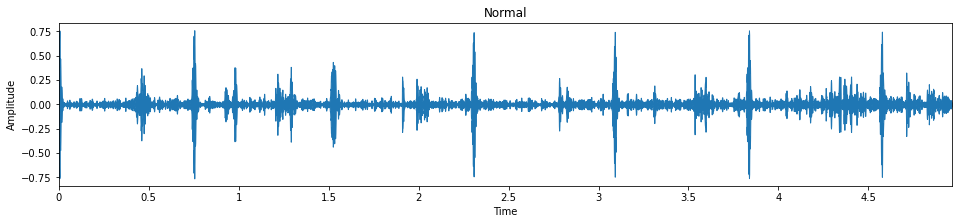

In [ ]:
sound_sample, sample_rate = sampleCategory(file, "Normal")

In [ ]:
# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

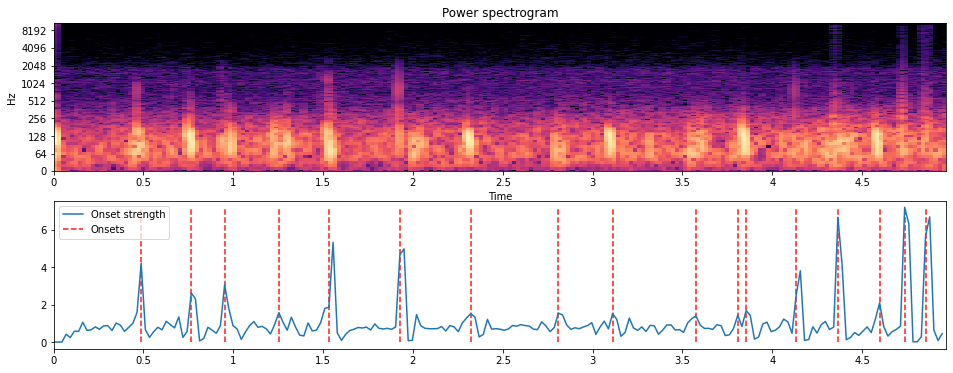

In [ ]:
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

In [ ]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
# Backtrack the events using the RMS values
rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])

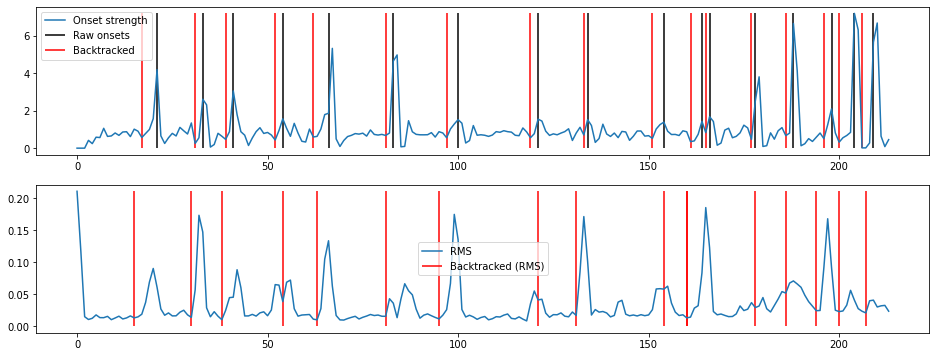

In [ ]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms[0], label='RMS')
plt.vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

### Extra Code For Now 

# Classification


### Loading Data

In [ ]:
def load_file_data (folder, file_names, duration=12, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio length :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [ ]:
# Encodeing the five types: 'artifact','murmur','normal'
# ('extrastole','extrahls') are murmurs

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)

int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [ ]:
A_folder=PATH+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(PATH+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(PATH+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(PATH+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(PATH+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(PATH+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_a/artifact__201106010559.wav
fixing audio length : artifact__201106010559.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_a/artifact__201105041959.wav
fixing audio length : artifact__201105041959.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_a/artifact__201106030612.wav
fixing audio length : artifact__201106030612.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_a/artifact__201106021541.wav
fixing audio length : artifact__201106021541.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_a/artifact__201105190800.wav
fixing audio length : artifact__201105190800.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_a/artifact__201105061143.wav
fixing audio length : artifact__201105061143.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_a/artifact__201105040918.wav
fixing audio length : artifact__201105040918.wav

In [ ]:
# load dataset-b, keep them separate for testing purpose 
B_folder=PATH+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(PATH+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(PATH+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(PATH+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(PATH+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_b/normal__176_1307988171173_B.wav
fixing audio length : normal__176_1307988171173_B.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_b/normal_noisynormal_109_1305653972028_F.wav
fixing audio length : normal_noisynormal_109_1305653972028_F.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_b/normal__128_1306344005749_B.wav
fixing audio length : normal__128_1306344005749_B.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_b/normal_noisynormal_108_1305654420093_A.wav
fixing audio length : normal_noisynormal_108_1305654420093_A.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_b/normal_noisynormal_178_1307989887769_B1.wav
fixing audio length : normal_noisynormal_178_1307989887769_B1.wav
load file  /content/drive/MyDrive/HeartBeatSounds/Hearbeats//set_b/normal__190_1308076920011_C1.wav
fixing audio length : normal__190_1308076920011_C1.wav
load file  /

### Conctaneation

In [ ]:
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [ ]:
x_data.shape

(585, 40, 1)

In [ ]:
test_x.shape

(247, 40, 1)

In [ ]:
test_y.shape

(247,)

### Splitting

In [ ]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7, random_state=42, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.5, random_state=42, shuffle=True)

# One-Shot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [ ]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)

print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)

print ("")
print ("trainAggregationMethoding data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (585,)
data size of the array: : 585
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  4680

audio data shape:  (585, 40, 1)
data size of the array: : 23400
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  93600

trainAggregationMethoding data shape:  (409, 40, 1)
training label shape:  (409, 3)

validation data shape:  (88, 40, 1)
validation label shape:  (88, 3)

test data shape:  (88, 40, 1)
test label shape:  (88, 3)


### FNN MODEL 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=64, return_sequences=True,input_shape = (40,1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc','mse', 'mae', 'mape'])
model.summary()

Build LSTM RNN model ...
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 40, 64)            16896     
                                                                 
 lstm_9 (LSTM)               (None, 64)                33024     
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_33 (Dense)           

In [ ]:
%%time
# saved model checkpoint file
best_model_file="./best_model_trained.hdf5"
#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32

# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_val, y_val),
                  callbacks=callback) 

print ("training finised!")

training started..... please wait.

Epoch 1: loss improved from inf to 1.19688, saving model to ./best_model_trained.hdf5

Epoch 2: loss improved from 1.19688 to 1.07266, saving model to ./best_model_trained.hdf5

Epoch 3: loss improved from 1.07266 to 1.05292, saving model to ./best_model_trained.hdf5

Epoch 4: loss improved from 1.05292 to 1.01084, saving model to ./best_model_trained.hdf5

Epoch 5: loss improved from 1.01084 to 0.97811, saving model to ./best_model_trained.hdf5

Epoch 6: loss improved from 0.97811 to 0.97479, saving model to ./best_model_trained.hdf5

Epoch 7: loss improved from 0.97479 to 0.96682, saving model to ./best_model_trained.hdf5

Epoch 8: loss improved from 0.96682 to 0.93021, saving model to ./best_model_trained.hdf5

Epoch 9: loss did not improve from 0.93021

Epoch 10: loss did not improve from 0.93021

Epoch 11: loss improved from 0.93021 to 0.90278, saving model to ./best_model_trained.hdf5

Epoch 12: loss improved from 0.90278 to 0.88776, saving mod

In [ ]:
# Keras reported accuracy:
score = model.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

score = model.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

score = model.evaluate(test_x, test_y, verbose=0) 
print ("model unlabeled data score   : ", round(score[1]*100), "%")

model train data score       :  70 %
model test data score        :  65 %
model validation data score  :  65 %
model unlabeled data score   :  90 %


<Figure size 1584x720 with 0 Axes>

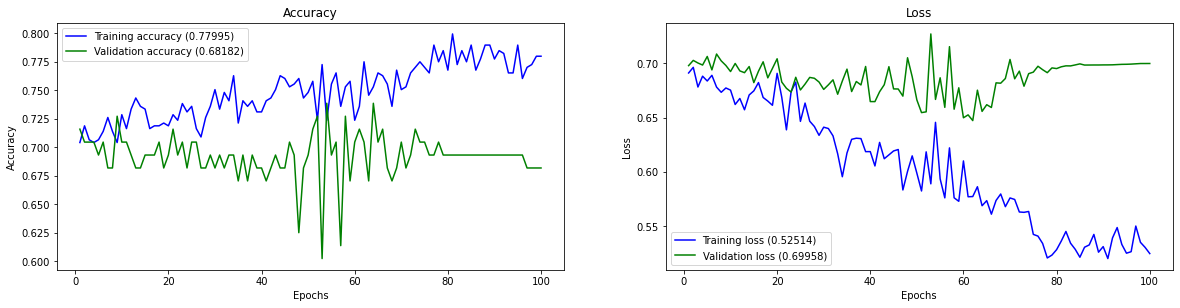

CPU times: user 338 ms, sys: 10.6 ms, total: 348 ms
Wall time: 349 ms


In [ ]:
%%time
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

3/3 [==============================] - 0s 14ms/step - loss: 0.7259 - acc: 0.6591 - mse: 0.1464 - mae: 0.2891 - mape: 144567696.0000
Model evaluation accuracy:  66 %


In [ ]:
# prediction class 
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

3/3 [==============================] - 0s 15ms/step
prediction test return : 2 - normal


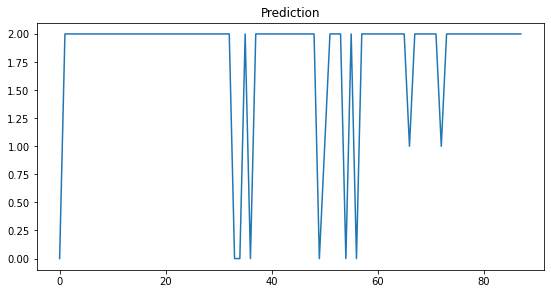

In [ ]:
plt.figure(1,figsize=(20,10))
# plot Classification Metrics: Accuracy 
plt.subplot(221, title='Prediction')
plt.plot(y_pred)
plt.show()

In [ ]:
def preprocessing (file_path, duration=12, sr=22050):
    input_length=sr*duration
    process_file=[]
    X, sr = librosa.load(file_path, sr=sr, duration=duration) 
    dur = librosa.get_duration(y=X, sr=sr)
    # pad audio file same duration
    if (round(dur) < duration):
        y = librosa.util.fix_length(X, input_length)                
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
    feature = np.array(mfccs).reshape([-1,1])
    process_file.append(feature)
    process_file_array = np.asarray(process_file)
    return process_file_array

In [ ]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

3/3 [==============================] - 0s 15ms/step


In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       0.86      1.00      0.92         6
      murmur       1.00      0.09      0.17        33
      normal       0.63      1.00      0.77        49

    accuracy                           0.66        88
   macro avg       0.83      0.70      0.62        88
weighted avg       0.78      0.66      0.56        88



### FNN MODEL 2

In [ ]:
input_shape=(40,1)
model = Sequential()
model.add(LSTM(128,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(CLASSES), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc','mse', 'mae', 'mape'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 128)               66560     
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 48)                3120      
                                                                 
 dropout_37 (Dropout)        (None, 48)              

In [ ]:
%%time
# saved model checkpoint file
best_model_file="./best_model_trained.hdf5"
#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=12
MAX_EPOCHS=100
MAX_BATCH=32

# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_val, y_val),
                  callbacks=callback) 

print ("training finised!")

training started..... please wait.

Epoch 1: loss improved from inf to 1.03942, saving model to ./best_model_trained.hdf5

Epoch 2: loss improved from 1.03942 to 0.84844, saving model to ./best_model_trained.hdf5

Epoch 3: loss improved from 0.84844 to 0.76949, saving model to ./best_model_trained.hdf5

Epoch 4: loss did not improve from 0.76949

Epoch 5: loss improved from 0.76949 to 0.76732, saving model to ./best_model_trained.hdf5

Epoch 6: loss improved from 0.76732 to 0.75457, saving model to ./best_model_trained.hdf5

Epoch 7: loss improved from 0.75457 to 0.72647, saving model to ./best_model_trained.hdf5

Epoch 8: loss did not improve from 0.72647

Epoch 9: loss improved from 0.72647 to 0.68835, saving model to ./best_model_trained.hdf5

Epoch 10: loss did not improve from 0.68835

Epoch 11: loss improved from 0.68835 to 0.66958, saving model to ./best_model_trained.hdf5

Epoch 12: loss improved from 0.66958 to 0.66322, saving model to ./best_model_trained.hdf5

Epoch 13: loss

In [ ]:
# Keras reported accuracy:
score = model.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = model.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

score = model.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

score = model.evaluate(test_x, test_y, verbose=0) 
print ("model unlabeled data score   : ", round(score[1]*100), "%")

model train data score       :  71 %
model test data score        :  66 %
model validation data score  :  67 %
model unlabeled data score   :  87 %


<Figure size 1584x720 with 0 Axes>

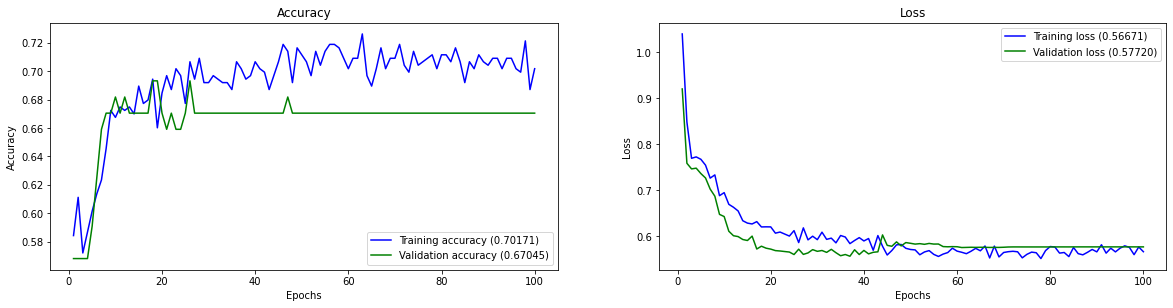

CPU times: user 340 ms, sys: 9.33 ms, total: 350 ms
Wall time: 351 ms


In [ ]:
%%time
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

3/3 [==============================] - 0s 18ms/step - loss: 0.6075 - acc: 0.6591 - mse: 0.1373 - mae: 0.2753 - mape: 137634704.0000
Model evaluation accuracy:  66 %


In [ ]:
# prediction class 
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

3/3 [==============================] - 0s 17ms/step
prediction test return : 2 - normal


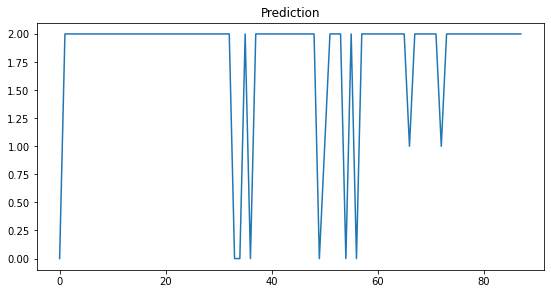

In [ ]:
plt.figure(1,figsize=(20,10))
# plot Classification Metrics: Accuracy 
plt.subplot(221, title='Prediction')
plt.plot(y_pred)
plt.show()

In [ ]:
def preprocessing (file_path, duration=12, sr=22050):
    input_length=sr*duration
    process_file=[]
    X, sr = librosa.load(file_path, sr=sr, duration=duration) 
    dur = librosa.get_duration(y=X, sr=sr)
    # pad audio file same duration
    if (round(dur) < duration):
        y = librosa.util.fix_length(X, input_length)                
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
    feature = np.array(mfccs).reshape([-1,1])
    process_file.append(feature)
    process_file_array = np.asarray(process_file)
    return process_file_array

In [ ]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

3/3 [==============================] - 0s 17ms/step


In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       0.86      1.00      0.92         6
      murmur       1.00      0.09      0.17        33
      normal       0.63      1.00      0.77        49

    accuracy                           0.66        88
   macro avg       0.83      0.70      0.62        88
weighted avg       0.78      0.66      0.56        88



### CNN

#### Functions

In [ ]:
def padding(array, xx, yy):
  """
  :param array: numpy array
  :param xx: desired height
  :param yy: desirex width
  :return: padded array
  """
  h = array.shape[0]
  w = array.shape[1]
  a = max((xx - h) // 2,0)
  aa = max(0,xx - a - h)
  b = max(0,(yy - w) // 2)
  bb = max(yy - b - w,0)
  return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [ ]:
myMax = 0
for i,row in enumerate(x_train):
  myMax = max(myMax, len(row))
print("Max = ",myMax)

new_max = round(myMax, -4)+10000 
print("Max = ",round(myMax, -4)+10000)
MAX_WIDTH = new_max//128
print("Max Width = ",MAX_WIDTH)


Max =  40
Max =  10000
Max Width =  78


In [ ]:
SAMPLE_RATE=44100

In [ ]:
def generate_features(y_cut):
    
    max_size=MAX_WIDTH #my max audio file feature width 
    stft = padding(np.abs(librosa.stft(y_cut, n_fft=255, hop_length = 512)), 128, max_size)
    MFCCs = padding(librosa.feature.mfcc(y_cut, n_fft=255, hop_length=512,n_mfcc=128),128,max_size)
    spec_centroid = librosa.feature.spectral_centroid(y=y_cut, sr=SAMPLE_RATE)
    chroma_stft = librosa.feature.chroma_stft(y=y_cut, sr=SAMPLE_RATE)
    spec_bw = librosa.feature.spectral_bandwidth(y=y_cut, sr=SAMPLE_RATE)
    #Now the padding part
    
    image = np.array([padding(normalize(spec_bw),1, max_size)]).reshape(1,max_size)
    image = np.append(image,padding(normalize(spec_centroid),1, max_size), axis=0) 
    #repeat the padded spec_bw,spec_centroid and chroma stft until they are stft and MFCC-sized
    for i in range(0,9):
        image = np.append(image,padding(normalize(spec_bw),1, max_size), axis=0)
        image = np.append(image, padding(normalize(spec_centroid),1, max_size), axis=0)
        image = np.append(image, padding(normalize(chroma_stft),12, max_size), axis=0)
    image=np.dstack((image,np.abs(stft)))
    image=np.dstack((image,MFCCs))
    return image

In [ ]:
def get_features(df_in):   
  features=[]     
  labels = [] #empty array to store labels     
      
  for j in range(0,len(df_in)):  
      
      data = generate_features(df_in[j][1])
      features.append(data[np.newaxis,...])    
  output=np.concatenate(features,axis=0)     
  return(np.array(output))

#### Generate Features

In [ ]:
print(np.array(x_train[1][1]))

[214.24611]


In [ ]:
#use get_features to calculate and store the features
train_features = get_features(x_train)
test_features = get_features(x_test)
val_features = get_features(x_val)

In [ ]:
train_features.shape

(409, 128, 78, 3)

#### Functions

In [ ]:
def make_default_hidden_layers(inputs):
    """
    Used to generate a default set of hidden layers. The structure used in this network is defined as:
    
    Conv2D -> BatchNormalization -> Pooling -> Dropout
    """
    x = Conv2D(16, (3, 3))(inputs)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32, (3, 3))(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(32, (3, 3))(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

def build_label_branch( inputs):   
        """
        Used to build the age branch of our network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("softmax", name="label")(x)
        return x

def assemble_full_model(length=128, width=MAX_WIDTH):
        """
        Used to assemble our multi-output model CNN.
        """
        inputs = Input(shape=(length,width,3))
        label_branch = build_label_branch(inputs)



        model = Model(inputs=inputs,
                     outputs = label_branch )
        return model

In [ ]:
input_shape=(128,78,3)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))

In [ ]:
CNNmodel.compile(optimizer='adam',loss=tf.keras.losses.Loss,metrics=['accuracy'])

In [ ]:
train_features.shape

(409, 128, 78, 3)

In [ ]:
history = CNNmodel.fit(train_features, y_train, epochs=20, validation_data= (val_features, y_val))


#### Build Model

In [ ]:
CNNModel = assemble_full_model(128, MAX_WIDTH)

In [ ]:
tf.keras.metrics.MeanSquaredError()

In [ ]:
from keras.optimizers import Adam
init_lr = 0.0001
epochs = 20
opt = Adam(lr=0.00002)
# tf.keras.optimizers.SGD()
CNNModel.compile(optimizer= tf.keras.optimizers.SGD(), 
              loss={
                  'label': 'mean_squared_error'}, 
              metrics={
                  'label':tf.keras.metrics.MeanSquaredError()})

In [ ]:
from keras.callbacks import ModelCheckpoint
batch_size = 10
valid_batch_size = 10
# Train the model for 20 epochs
history = CNNModel.fit(train_features, y_train,
   epochs=10, validation_data=(val_features, y_val))

#### Results

In [ ]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,21)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
# Run predict
Y_pred = CNNModel.predict(test_features)
print(test_features.shape)
print(len(Y_pred))
# plot_diff(y_test, Y_pred, title='S1')


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s1)), s1.flatten(), color='green')
plt.scatter(range(len(s1)), np.array(y_test['s1']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted S1", fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(s2)), s2.flatten(), color='green')
plt.scatter(range(len(s2)), np.array(y_test['s2']), color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted S2", fontsize=18)
plt.show()

In [ ]:
# Plot RMSE
plot_metrics(metric_name='s1_loss', title='S1',ylim=20)
plot_metrics(metric_name='s2_loss', title='S2',ylim=20)

In [ ]:
# Plot RMSE
plot_metrics(metric_name='s1_mean_squared_error', title='S1',ylim=20)
plot_metrics(metric_name='s2_mean_squared_error', title='S2',ylim=10)

In [ ]:
score = CNNModel.evaluate(test_features, y_test)

In [ ]:
appendResults("CNN", "Scheduler", "MSE", "MSE", history.history["loss"][epochs-1], history.history["val_loss"][epochs-1], score[0])

In [ ]:
displayResults()

### CNN From Video

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


In [ ]:
class FNNNetwork(nn.Module):

    def __init__(self, input_layer_size, layer1_size, num_classes):
        super().__init__()
        self.flatten = nn.Flatten()
        self.dense_layers = nn.Sequential(
            nn.Linear(input_layer_size, layer1_size),
            nn.ReLU(),
            nn.Linear(layer1_size, num_classes)
        )
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.flatten(input_data)
        logits = self.dense_layers(x)
        predictions = self.softmax(logits)
        return predictions


In [ ]:
from torch import nn
from torchsummary import summary


class CNNNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        # 4 conv blocks / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(128 * 5 * 4, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        logits = self.linear(x)
        predictions = self.softmax(logits)
        return predictions

In [ ]:
import os
import torch
from torch.utils.data import Dataset
import torchaudio


class HeartDataset(Dataset):

    def __init__(self, annotations, audio_dir, transformation,
                 target_sample_rate, num_samples, device):

        self.annotations = annotations
        self.audio_dir = audio_dir
        self.device = device
        self.transformation = transformation.to(self.device)
        self.target_sample_rate = target_sample_rate
        self.num_samples = num_samples

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        audio_sample_path = self._get_audio_sample_path(index)
        label = self._get_audio_sample_label(index)
        signal, sr = torchaudio.load(audio_sample_path)
        signal = signal.to(self.device)
        signal = self._resample(signal, sr)
        signal = self._mix_down(signal)
        signal = self._cut(signal)
        signal = self._padding(signal)
        signal = self.transformation(signal)
        return signal, label

    def _cut(self, signal):
        if signal.shape[1] > self.num_samples:
            signal = signal[:, :self.num_samples]
        return signal

    def _padding(self, signal):
        length_signal = signal.shape[1]
        if length_signal < self.num_samples:
            num_missing_samples = self.num_samples - length_signal
            last_dim_padding = (0, num_missing_samples)
            signal = torch.nn.functional.pad(signal, last_dim_padding)
        return signal

    def _resample(self, signal, sr):
        if sr != self.target_sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.target_sample_rate).to(self.device)
            signal = resampler(signal)
        return signal

    def _mix_down(self, signal):
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _get_audio_sample_path(self, index):
        path = os.path.join(self.audio_dir, self.annotations.iloc[index, 1])
        if self.annotations.iloc[index, 0] == 'b':
            path = path.replace('Btraining_murmur_Btraining', 'murmur')
            path = path.replace('Btraining_normal_Btraining', 'normal')
            path = path.replace('Btraining_extrastole', 'extrastole_')
            path = path.replace('Btraining_murmur', 'murmur_')
            path = path.replace('Btraining_normal', 'normal_')

        # print(f'PATH OF AUDIO:{path}')
        return path

    def _get_audio_sample_label(self, index):
        return self.annotations.iloc[index, 2]

In [ ]:
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 10 
NUM_SAMPLES = 441000
SAMPLE_RATE = 441000

In [ ]:
def create_data_loader(data, batch_size):
    dataloader = DataLoader(data, batch_size=batch_size)
    return dataloader

In [ ]:
train_data = []
for i in range(len(x_train)):
   train_data.append([x_train[i], y_train[i]])
test_data = []
for i in range(len(x_test)):
   test_data.append([x_test[i], y_test[i]])
val_data = []
for i in range(len(x_val)):
   val_data.append([x_val[i], y_val[i]])



In [ ]:
if torch.cuda.is_available():
        device = "cuda"
else:
        device = "cpu"

In [ ]:
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=1024,
        hop_length=512,
        n_mels=64
    )

train_data = HeartDataset  (train_data,
                        PATH,
                        mel_spectrogram,
                        SAMPLE_RATE,
                        NUM_SAMPLES,
                        device)

val_data = HeartDataset(val_data,
                        PATH,
                        mel_spectrogram,
                        SAMPLE_RATE,
                        NUM_SAMPLES,
                        device)

In [ ]:
train_dataloader = create_data_loader(train_data, BATCH_SIZE)
test_dataloader = create_data_loader(test_data, BATCH_SIZE)
val_dataloader = create_data_loader(val_data, BATCH_SIZE)

In [ ]:
def calculate_accuracy(predicted, true_labels):
    accuracy = 0
    for i in range(predicted.shape[0]):
        if predicted[i] == true_labels[i]:
            accuracy += 1
    return accuracy


def train_single_epoch(model, train_data_loader, validation_data_loader, loss_fn, optimiser, device):
    # Training model
    model.train()
    loss = 0
    global best_accuracy
    global best_epoch
    global LEARNING_RATE
    if epoch % 20 == 0:
        LEARNING_RATE = LEARNING_RATE / 2
        print(f'Learning Rate = {LEARNING_RATE}')
        optimiser.param_groups[0]['lr'] = LEARNING_RATE
    for input_t, target in train_data_loader:
        input_t, target = input_t.to(device), target.to(device)

        # calculate loss
        prediction = model(input_t)
        loss = loss_fn(prediction, target)

        # backpropagate error and update weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
    print(f"Train loss: {loss.item()}")
    train_loss.append(loss.item())

    # Testing model on validation data
    model.eval()
    total_accuracy = 0
    for input_t, target in validation_data_loader:
        with torch.no_grad():
            input_t, target = input_t.to(device), target.to(device)
            predictions = model(input_t)
            expected = torch.argmax(predictions, dim=1)
            # print(f'EXPECTED:{expected}\nTARGET  :{target}')

            total_accuracy += calculate_accuracy(expected, target)
            loss = loss_fn(predictions, target)
    total_accuracy /= len(val_data)
    print(f"Validation loss: {loss.item()}")
    print(f'Validation Accuracy : {total_accuracy * 100}%')
    validation_loss.append(loss.item())
    validation_accuracy.append(total_accuracy)
    if total_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'BestEpoch.pth')
        best_epoch = epoch
        print('\033[91m' + 'New Weights are Saved !! ' * 3 + '\033[0m')
        best_accuracy = total_accuracy


def train(model, train_data_loader, validation_data_loader, loss_fn, optimiser, device, epochs):
    global epoch
    for i in range(epochs):
        print(f"Epoch {i + 1}")
        epoch = i + 1
        train_single_epoch(model, train_data_loader, validation_data_loader, loss_fn, optimiser, device)
        print("---------------------------")
    print("Finished training")


In [ ]:
print(f"Using {device}")


# initialise loss funtion + optimiser
loss_fn = nn.CrossEntropyLoss()
FNN = FNNNetwork(1 * 64 * 431, 32, 4).to(device)

optimiser = torch.optim.Adam(FNN.parameters(), lr=LEARNING_RATE)

# train model
train(fnn, train_dataloader, val_dataloader, loss_fn, optimiser, device, EPOCHS)

# save model
torch.save(FNNNetwork.state_dict(), "feedforwardnet.pth")
print("Trained feed forward net saved at feedforwardnet.pth")

### CNN FINAL


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(409, 40, 1)
(409, 3)
(88, 40, 1)
(88, 3)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 10, 4, 1)
x_test = x_test.reshape(x_test.shape[0], 10, 4, 1)
x_val = x_val.reshape(x_val.shape[0], 10, 4, 1)

In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [ ]:
Model_Check_Conv2D = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_Conv2D_model")

In [ ]:
output_dim = 4
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
# input_shape_dim = (xTrain.shape[1],1)

In [ ]:
def make_default_hidden_layers(inputs):
    """
    Used to generate a default set of hidden layers. The structure used in this network is defined as:
    
    Conv2D -> BatchNormalization -> Pooling -> Dropout
    """
    x = Conv2D(16, (3, 3))(inputs)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=-1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
    # x = Conv2D(32, (3, 3))(x)
    # x = Activation("relu")(x)
    # x = BatchNormalization(axis=-1)(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.25)(x)
    # x = Conv2D(32, (3, 3))(x)
    # x = Activation("relu")(x)
    # x = BatchNormalization(axis=-1)(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.25)(x)
    return x

def build_label_branch(inputs):   
        """
        Used to build the label branch of our network.
        This branch is composed of three Conv -> BN -> Pool -> Dropout blocks, 
        followed by the Dense output layer.
        """
        x = make_default_hidden_layers(inputs)
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(3)(x)
        x = Activation("softmax", name="label")(x)
        return x

def assemble_full_model():
        """
        Used to assemble our multi-output model CNN.
        """
        inputs = Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]))
        label_branch = build_label_branch(inputs)
    


        model = Model(inputs=inputs,
                     outputs = label_branch)
        return model

In [ ]:
input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])
CNNmodel = models.Sequential()

CNNmodel.add(Conv2D(32,(3, 3),padding="same",activation="relu",input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
CNNmodel.add(MaxPool2D(pool_size=(2, 2)))

CNNmodel.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))
CNNmodel.add(Dropout(0.2))
CNNmodel.add(MaxPool2D(pool_size=(2, 2)))

CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))

In [ ]:
CNNMODEL = assemble_full_model()

In [ ]:
print(CNNMODEL.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 4, 1)]        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 2, 16)          160       
                                                                 
 activation (Activation)     (None, 8, 2, 16)          0         
                                                                 
 batch_normalization (BatchN  (None, 8, 2, 16)         64        
 ormalization)                                                   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 1, 16)         0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 4, 1, 16)          0     

In [ ]:
CNNMODEL.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
Conv2D_Model = CNNMODEL.fit(x_train, y_train, batch_size=64, epochs=100,
                                validation_data=(x_val, y_val), callbacks=Model_Check_Conv2D)

Epoch 1/100
7/7 [==============================] - 0s 19ms/step - loss: 0.5422 - accuracy: 0.7237 - val_loss: 0.5507 - val_accuracy: 0.7273
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5436 - accuracy: 0.7262 - val_loss: 0.5519 - val_accuracy: 0.7045
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5455 - accuracy: 0.7335 - val_loss: 0.5608 - val_accuracy: 0.7045
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5517 - accuracy: 0.7384 - val_loss: 0.5649 - val_accuracy: 0.7045
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5592 - accuracy: 0.7188 - val_loss: 0.5643 - val_accuracy: 0.6932
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5251 - accuracy: 0.7628 - val_loss: 0.5535 - val_accuracy: 0.6932
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5299 - accuracy: 0.7506 - val_loss: 0.5413 - val_accuracy: 0.7159
Epoch 8/100
7/7 [=======

In [ ]:
score = CNNMODEL.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = CNNMODEL.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

score = CNNMODEL.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

# score = Model_Conv2D.evaluate(test_x, test_y, verbose=0) 
# print ("model unlabeled data score   : ", round(score[1]*100), "%")

model train data score       :  78 %
model test data score        :  75 %
model validation data score  :  72 %


<Figure size 1584x720 with 0 Axes>

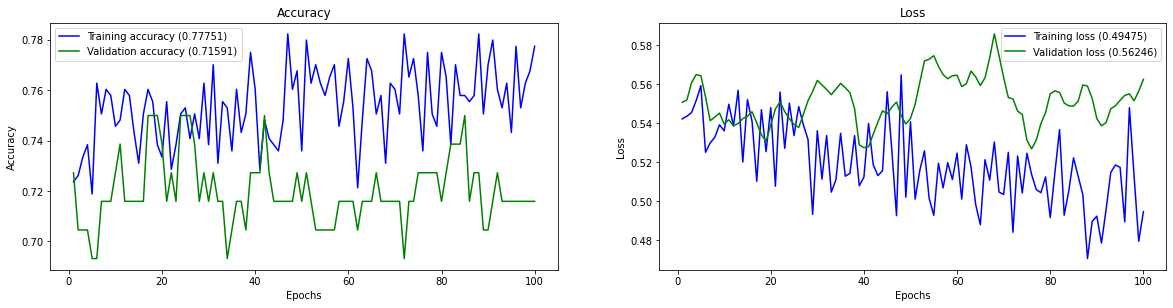

CPU times: user 339 ms, sys: 4.89 ms, total: 343 ms
Wall time: 346 ms


In [ ]:
%%time
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(Conv2D_Model)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# make a prediction
y_pred = CNNMODEL.predict(x_test, batch_size=5)
#check scores
scores = CNNMODEL.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

3/3 [==============================] - 0s 4ms/step - loss: 0.5509 - accuracy: 0.7500
Model evaluation accuracy:  75 %


In [ ]:
# prediction class 
y_pred = np.asarray(CNNMODEL.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

3/3 [==============================] - 0s 4ms/step
prediction test return : 2 - normal


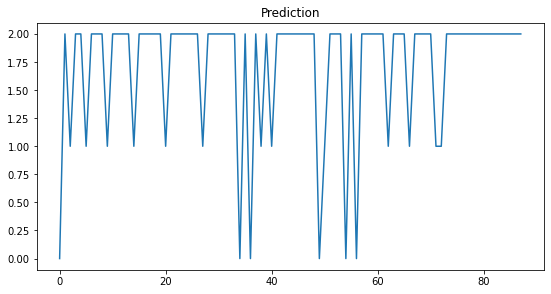

In [ ]:
plt.figure(1,figsize=(20,10))
# plot Classification Metrics: Accuracy 
plt.subplot(221, title='Prediction')
plt.plot(y_pred)
plt.show()

In [ ]:
def preprocessing (file_path, duration=12, sr=22050):
    input_length=sr*duration
    process_file=[]
    X, sr = librosa.load(file_path, sr=sr, duration=duration) 
    dur = librosa.get_duration(y=X, sr=sr)
    # pad audio file same duration
    if (round(dur) < duration):
        y = librosa.util.fix_length(X, input_length)                
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
    feature = np.array(mfccs).reshape([-1,1])
    process_file.append(feature)
    process_file_array = np.asarray(process_file)
    return process_file_array

In [ ]:
y_pred = np.asarray(CNNMODEL.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

3/3 [==============================] - 0s 4ms/step


In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00         6
      murmur       0.92      0.36      0.52        33
      normal       0.70      0.98      0.81        49

    accuracy                           0.75        88
   macro avg       0.87      0.78      0.78        88
weighted avg       0.80      0.75      0.72        88



### CNN MODEL 2

In [ ]:
Model_Conv2D = Sequential()
#
Model_Conv2D.add(Conv2D(32,(3, 3),padding="same",activation="relu",input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))
#
Model_Conv2D.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.2))
Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))

Model_Conv2D.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
Model_Conv2D.add(Dropout(0.2))
# Model_Conv2D.add(MaxPool2D(pool_size=(2, 2)))

Model_Conv2D.add(Flatten())
Model_Conv2D.add(Dense(2048, activation = "relu"))
Model_Conv2D.add(Dropout(0.2))
Model_Conv2D.add(Dense(1024, activation = "relu"))
Model_Conv2D.add(Dropout(0.2))
Model_Conv2D.add(Dense(3, activation = "softmax"))

In [ ]:
print(Model_Conv2D.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 10, 4, 32)         320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 2, 32)         0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 5, 2, 64)          18496     
                                                                 
 dropout_13 (Dropout)        (None, 5, 2, 64)          0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 1, 64)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 2, 1, 128)        

In [ ]:
Model_Conv2D.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [ ]:
Conv2D_Model = Model_Conv2D.fit(x_train, y_train, batch_size=64, epochs=100,
                                validation_data=(x_val, y_val), callbacks=Model_Check_Conv2D)

Epoch 1/100
7/7 [==============================] - 1s 125ms/step - loss: 0.5545 - accuracy: 0.7457 - val_loss: 0.7478 - val_accuracy: 0.7159
Epoch 2/100
7/7 [==============================] - 1s 90ms/step - loss: 0.5675 - accuracy: 0.7262 - val_loss: 0.7260 - val_accuracy: 0.7386
Epoch 3/100
7/7 [==============================] - 0s 71ms/step - loss: 0.5394 - accuracy: 0.7579 - val_loss: 0.6951 - val_accuracy: 0.7500
Epoch 4/100
7/7 [==============================] - 0s 66ms/step - loss: 0.5440 - accuracy: 0.7506 - val_loss: 0.7580 - val_accuracy: 0.7386
Epoch 5/100
7/7 [==============================] - 0s 70ms/step - loss: 0.5388 - accuracy: 0.7506 - val_loss: 0.7800 - val_accuracy: 0.7273
Epoch 6/100
7/7 [==============================] - 0s 68ms/step - loss: 0.5667 - accuracy: 0.7408 - val_loss: 0.7521 - val_accuracy: 0.7159
Epoch 7/100
7/7 [==============================] - 0s 66ms/step - loss: 0.5300 - accuracy: 0.7482 - val_loss: 0.7681 - val_accuracy: 0.7159
Epoch 8/100
7/7 [==

In [ ]:
score = CNNMODEL.evaluate(x_train, y_train, verbose=0) 
print ("model train data score       : ",round(score[1]*100) , "%")

score = CNNMODEL.evaluate(x_test, y_test, verbose=0) 
print ("model test data score        : ",round(score[1]*100) , "%")

score = CNNMODEL.evaluate(x_val, y_val, verbose=0) 
print ("model validation data score  : ", round(score[1]*100), "%")

# score = Model_Conv2D.evaluate(test_x, test_y, verbose=0) 
# print ("model unlabeled data score   : ", round(score[1]*100), "%")

model train data score       :  78 %
model test data score        :  75 %
model validation data score  :  72 %


<Figure size 1584x720 with 0 Axes>

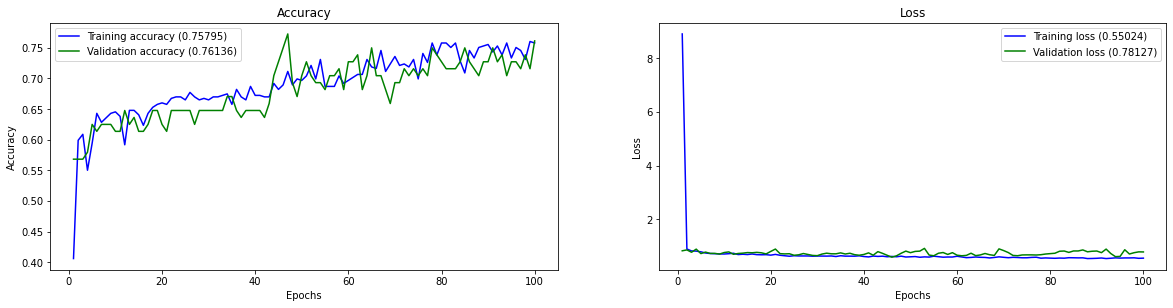

CPU times: user 337 ms, sys: 6.13 ms, total: 344 ms
Wall time: 345 ms


In [ ]:
%%time
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(Conv2D_Model)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# make a prediction
y_pred = CNNMODEL.predict(x_test, batch_size=5)
#check scores
scores = CNNMODEL.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

3/3 [==============================] - 0s 4ms/step - loss: 0.5509 - accuracy: 0.7500
Model evaluation accuracy:  75 %


In [ ]:
# prediction class 
y_pred = np.asarray(CNNMODEL.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

3/3 [==============================] - 0s 3ms/step
prediction test return : 2 - normal


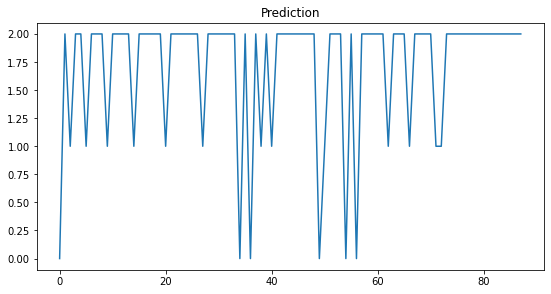

In [ ]:
plt.figure(1,figsize=(20,10))
# plot Classification Metrics: Accuracy 
plt.subplot(221, title='Prediction')
plt.plot(y_pred)
plt.show()

In [ ]:
def preprocessing (file_path, duration=12, sr=22050):
    input_length=sr*duration
    process_file=[]
    X, sr = librosa.load(file_path, sr=sr, duration=duration) 
    dur = librosa.get_duration(y=X, sr=sr)
    # pad audio file same duration
    if (round(dur) < duration):
        y = librosa.util.fix_length(X, input_length)                
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
    feature = np.array(mfccs).reshape([-1,1])
    process_file.append(feature)
    process_file_array = np.asarray(process_file)
    return process_file_array

In [ ]:
y_pred = np.asarray(CNNMODEL.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

3/3 [==============================] - 0s 4ms/step


In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00         6
      murmur       0.92      0.36      0.52        33
      normal       0.70      0.98      0.81        49

    accuracy                           0.75        88
   macro avg       0.87      0.78      0.78        88
weighted avg       0.80      0.75      0.72        88

